# I. Import Libraries

In [345]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns
pd.set_option('display.max_columns', None)
from scipy import stats
import scipy
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyoff
import plotly
import plotly.graph_objs as go
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

In [346]:
df = pd.read_csv('data_cleaned_final_Iowa_Liquor_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885075 entries, 0 to 3885074
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice Number         object 
 1   Order Date             object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               int64  
 7   County                 object 
 8   Category               int64  
 9   Category Name          object 
 10  Vendor Number          int64  
 11  Vendor Name            object 
 12  Item Number            int64  
 13  Product Name           object 
 14  Pack                   int64  
 15  Bottle Volume (ml)     int64  
 16  State Bottle Cost      float64
 17  State Bottle Retail    float64
 18  Bottles Sold           int64  
 19  Sale (Dollars)         float64
 20  Volume Sold (Liters)   float64
 21  Volume Sold (Gallons)  float64
 22  US Counties       

In [347]:
# Change type some features
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885075 entries, 0 to 3885074
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice Number         object        
 1   Order Date             datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               int64         
 7   County                 object        
 8   Category               int64         
 9   Category Name          object        
 10  Vendor Number          int64         
 11  Vendor Name            object        
 12  Item Number            int64         
 13  Product Name           object        
 14  Pack                   int64         
 15  Bottle Volume (ml)     int64         
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

In [348]:
df.head(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude,Customer Segment
0,INV-54554500001,2023-01-02,5245,BEST TRIP,"1516, SE 1ST ST",DES MOINES,50315,POLK,1022200,100% AGAVE TEQUILA,260,DIAGEO AMERICAS,89177,CASAMIGOS REPOSADO 750 (ml),6,750,29.99,44.99,3,134.97,2.25,0.59,1878,-93.61379,41.57608,Potential Loyalist
1,INV-54554700023,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,3200 SOUTHEAST 14TH STREET,DES MOINES,50320,POLK,1022100,MIXTO TEQUILA,395,PROXIMO,89193,JOSE CUERVO ESPECIAL REPOSADO 200 (ml),48,200,3.63,5.45,48,261.60,9.60,2.53,1878,-93.59738,41.55503,Potential Loyalist
2,INV-54554700003,2023-01-02,6303,WORLD LIQUOR & TOBACCO + VAPORS / DES MOINES,3200 SOUTHEAST 14TH STREET,DES MOINES,50320,POLK,1012200,SCOTCH WHISKIES,260,DIAGEO AMERICAS,4626,BUCHANAN DELUXE 12YR 750 (ml),12,750,20.99,31.49,12,377.88,9.00,2.37,1878,-93.59738,41.55503,Potential Loyalist


In [349]:
RFM_color = ['#ef6b84', '#bf445b', '#a00b24', '#f9022b']
sns.color_palette(RFM_color)

[(0.9372549019607843, 0.4196078431372549, 0.5176470588235295),
 (0.7490196078431373, 0.26666666666666666, 0.3568627450980392),
 (0.6274509803921569, 0.043137254901960784, 0.1411764705882353),
 (0.9764705882352941, 0.00784313725490196, 0.16862745098039217)]

In [350]:
color_samples = ['#640616','#f9a4b3','#ef6b84', '#bf445b', '#a00b24', '#f9022b']
sns.color_palette(color_samples)

[(0.39215686274509803, 0.023529411764705882, 0.08627450980392157),
 (0.9764705882352941, 0.6431372549019608, 0.7019607843137254),
 (0.9372549019607843, 0.4196078431372549, 0.5176470588235295),
 (0.7490196078431373, 0.26666666666666666, 0.3568627450980392),
 (0.6274509803921569, 0.043137254901960784, 0.1411764705882353),
 (0.9764705882352941, 0.00784313725490196, 0.16862745098039217)]

In [351]:
custom_palette = sns.color_palette(color_samples, as_cmap=True)
custom_palette

['#640616', '#f9a4b3', '#ef6b84', '#bf445b', '#a00b24', '#f9022b']

# II. Diagnostic Analytics

In [352]:
'''
Case study questions:

Dimension: Sales
Question 1: What is the revenue, cost, and profit for each month?
Question 2: What is the monthly growth rate (MGR) of revenue?
Question 3: Is there any seasonal variation in revenue?

Dimension: Orders
Question 4: How many orders are placed each month?
Question 5: What is the average revenue per order?

Dimension: Customer
Question 6: How many monthly active customers (MACs) are there?
Question 7: What is the monthly retention rate (MRR)?
Question 8: What is the revenue and profit per customer?
Question 9: What is the revenue and profit per customer segment?

Dimension: Product
Question 10: What are the top-selling products for the year?
Question 11: How many units of each product are sold each month?
Question 12: How many different wine products does each customer consume?
Question 13: Do customers who consume a more diverse variety of wines tend to purchase more products and generate more profit?
Question 14: Is the number of wine types consumed affected by customer segment?

Dimension: Place
Question 15: Is the number of customers affected by geographic location?
Question 16: Is profit affected by geographic location?
'''


'\nCase study questions:\n\nDimension: Sales\nQuestion 1: What is the revenue, cost, and profit for each month?\nQuestion 2: What is the monthly growth rate (MGR) of revenue?\nQuestion 3: Is there any seasonal variation in revenue?\n\nDimension: Orders\nQuestion 4: How many orders are placed each month?\nQuestion 5: What is the average revenue per order?\n\nDimension: Customer\nQuestion 6: How many monthly active customers (MACs) are there?\nQuestion 7: What is the monthly retention rate (MRR)?\nQuestion 8: What is the revenue and profit per customer?\nQuestion 9: What is the revenue and profit per customer segment?\n\nDimension: Product\nQuestion 10: What are the top-selling products for the year?\nQuestion 11: How many units of each product are sold each month?\nQuestion 12: How many different wine products does each customer consume?\nQuestion 13: Do customers who consume a more diverse variety of wines tend to purchase more products and generate more profit?\nQuestion 14: Is the nu

# Dimension: Sales

# Question 1: What is the revenue, cost, and profit for each month?

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885075 entries, 0 to 3885074
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice Number         object        
 1   Order Date             datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               int64         
 7   County                 object        
 8   Category               int64         
 9   Category Name          object        
 10  Vendor Number          int64         
 11  Vendor Name            object        
 12  Item Number            int64         
 13  Product Name           object        
 14  Pack                   int64         
 15  Bottle Volume (ml)     int64         
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

In [354]:
# Create 'Total Cost' column
df['Total Cost'] = df['State Bottle Cost'] * df['Bottles Sold']

# Creating MonthKey field for reporting and visualization
df['Month Key'] = df['Order Date'].map(lambda date: 100*date.year + date.month)
df['Month Key'] = df['Month Key'].astype('str')

# Tạo cột mới "Month Key" từ cột "Order Date" với định dạng mm-yyyy
df['Month Key'] = df['Order Date'].dt.strftime('%Y-%m')

# Sample check
df.sample(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude,Customer Segment,Total Cost,Month Key
849346,INV-58202700062,2023-05-05,2551,HY-VEE FOOD STORE (1065) / CHARITON,2001 WEST COURT,CHARITON,50049,LUCAS,1081400,AMERICAN SCHNAPPS,65,JIM BEAM BRANDS,82847,DEKUYPER LUSCIOUS PEACHTREE 1000 (ml),12,1000,7.87,11.81,2,23.62,2.0,0.52,288,-93.32337,41.01456,Champions,15.74,2023-05
526631,INV-56838100017,2023-03-21,5151,BREW IDA GROVE,"500, HWY 175",IDA GROVE,51445,IDA,1062400,SPICED RUM,260,DIAGEO AMERICAS,43338,CAPTAIN MORGAN ORIGINAL SPICED 1750 (ml),6,1750,18.00,27.00,6,162.00,10.5,2.77,1789,-95.46725,42.35005,Champions,108.00,2023-03
448325,INV-56507300032,2023-03-08,5315,BROTHER'S MARKET WINE AND SPIRITS,110 SOUTH MAIN STREET,SIGOURNEY,52591,KEOKUK,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,86887,SOUTHERN COMFORT 1000 (ml),12,1000,12.97,19.46,2,38.92,2.0,0.52,1793,-92.20517,41.33328,Big Spenders,25.94,2023-03


In [355]:
# Group Revenue by Month
revenue_month = df.groupby('Month Key')['Sale (Dollars)'].sum().reset_index()
revenue_month['Revenue (Million Dollars)'] = round((revenue_month['Sale (Dollars)'] / 1000000),2)
revenue_month.drop('Sale (Dollars)', axis = 1, inplace = True)
revenue_month

,Month Key,Revenue (Million Dollars)
0,2023-01,31.82
1,2023-02,31.41
2,2023-03,35.61
3,2023-04,32.70
4,2023-05,39.72
5,2023-06,41.18
6,2023-07,35.84
7,2023-08,39.84
8,2023-09,35.14
9,2023-10,40.25


In [356]:
# Group Cost by Month
cost_month = df.groupby('Month Key')['Total Cost'].sum().reset_index()
cost_month['Cost (Million Dollars)'] = round((cost_month['Total Cost'] / 1000000),2)
cost_month.drop('Total Cost', axis = 1, inplace = True)

# Merge Revenue data with Cost data to one
summary_sale = cost_month.merge(revenue_month, on = 'Month Key')

# Calculate Profit for each month
summary_sale['Profit (Million Dollars)'] = summary_sale['Revenue (Million Dollars)'] - summary_sale['Cost (Million Dollars)']

# Calculate Profit Margin for each month
summary_sale['Profit Margin (%)'] = round((summary_sale['Profit (Million Dollars)'] / summary_sale['Revenue (Million Dollars)']) * 100,2)
summary_sale

,Month Key,Cost (Million Dollars),Revenue (Million Dollars),Profit (Million Dollars),Profit Margin (%)
0,2023-01,21.26,31.82,10.56,33.19
1,2023-02,21.01,31.41,10.40,33.11
2,2023-03,23.81,35.61,11.80,33.14
3,2023-04,21.82,32.70,10.88,33.27
4,2023-05,26.87,39.72,12.85,32.35
5,2023-06,27.44,41.18,13.74,33.37
6,2023-07,23.91,35.84,11.93,33.29
7,2023-08,26.59,39.84,13.25,33.26
8,2023-09,23.47,35.14,11.67,33.21
9,2023-10,26.83,40.25,13.42,33.34


In [357]:
summary_sale['Cost (Million Dollars)'].sum()

np.float64(439.88)

In [358]:
summary_sale_unpivot = summary_sale[['Month Key', 'Revenue (Million Dollars)', 'Profit (Million Dollars)']].copy()
summary_sale_unpivot = summary_sale_unpivot.set_index('Month Key').stack().reset_index()
summary_sale_unpivot = summary_sale_unpivot.rename(columns = {'level_1' : 'Metric', 0 : 'Values'})
summary_sale_unpivot

,Month Key,Metric,Values
0,2023-01,Revenue (Million Dollars),31.82
1,2023-01,Profit (Million Dollars),10.56
2,2023-02,Revenue (Million Dollars),31.41
3,2023-02,Profit (Million Dollars),10.40
4,2023-03,Revenue (Million Dollars),35.61
5,2023-03,Profit (Million Dollars),11.80
6,2023-04,Revenue (Million Dollars),32.70
7,2023-04,Profit (Million Dollars),10.88
8,2023-05,Revenue (Million Dollars),39.72
9,2023-05,Profit (Million Dollars),12.85


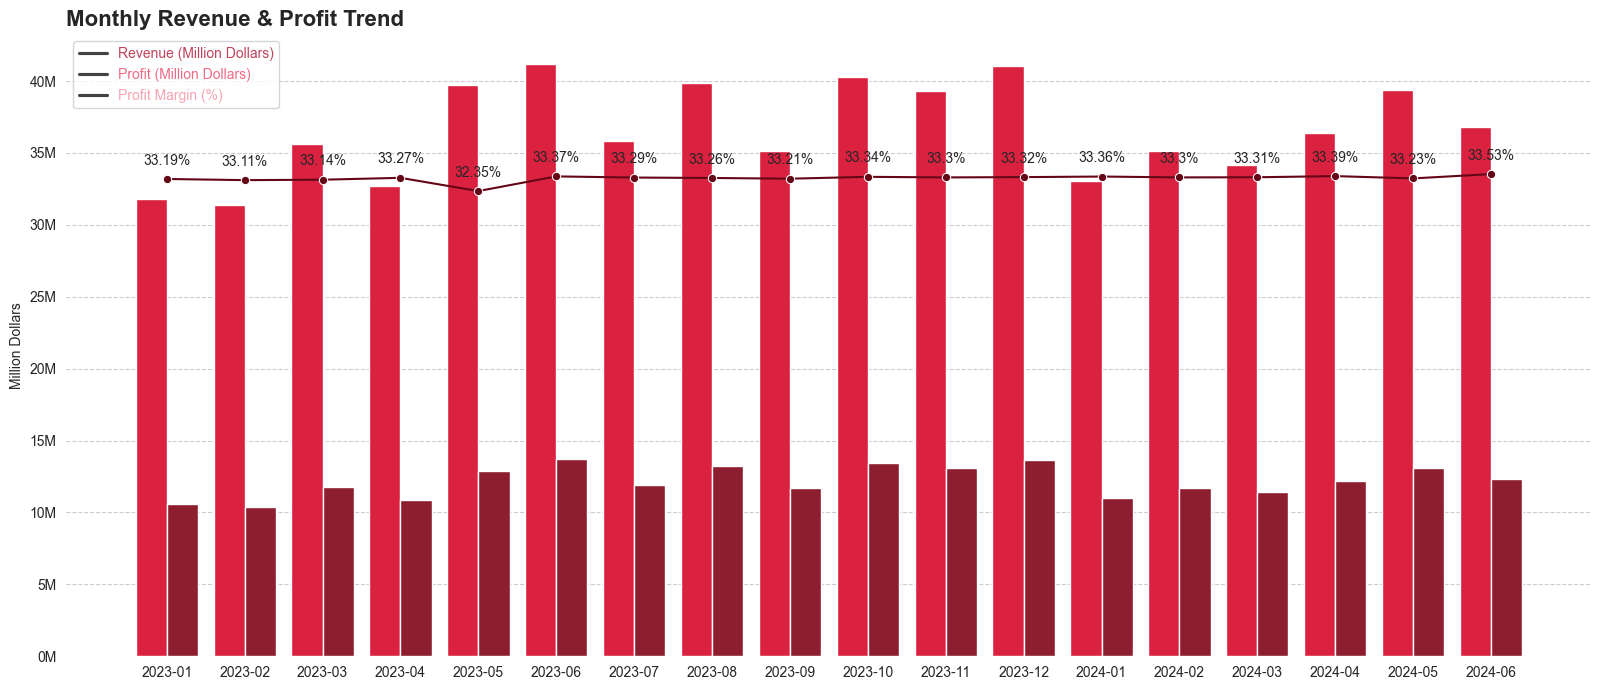

In [359]:
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (16,7))
plt.title('Monthly Revenue & Profit Trend', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.barplot(data = summary_sale_unpivot, x = 'Month Key', y = 'Values', hue= 'Metric', palette= ['#f9022b', '#a00b24'])
sns.lineplot(x="Month Key", y="Profit Margin (%)", color='#640616', data=summary_sale, marker="o" )
profit_margin = summary_sale['Profit Margin (%)'].to_list()
#Add number for each columns
for i, value in enumerate(profit_margin):
    plt.text(i, value + 1, f"{profit_margin[i]}%",  ha = 'center', fontsize=10)
plt.legend(labels=['Revenue (Million Dollars)', 'Profit (Million Dollars)', 'Profit Margin (%)'], labelcolor = ['#bf445b','#ef6b84', "#f9a4b3"])
plt.xlabel("")
plt.ylabel("Million Dollars")

plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x))) 
plt.show()

In [360]:
print('Average Monthly Revenue:',round(summary_sale['Revenue (Million Dollars)'].mean(),0),"M")
print('Average Monthly Profit:',round(summary_sale['Profit (Million Dollars)'].mean(),0),"M")
print('Average Monthly Profit Mergin:',round(summary_sale['Profit Margin (%)'].mean(),0),"%")

Average Monthly Revenue: 37.0 M
Average Monthly Profit: 12.0 M
Average Monthly Profit Mergin: 33.0 %


In [361]:
'''
Observations:
- Revenue and Profit Relationship: With an average revenue of $37.0 million per month, the data indicates a significant overall revenue landscape for the retail industry.
- Revenue Peaks: The highest monthly revenue in the observed period ranged between $32 to $39 million.
- Correlation Between Revenue and Profit: There is a noticeable correlation between revenue and profit. Months with higher revenue, such as June and December, also show increased profit growth.
- Stable Profit Margins: Profit margins remained relatively stable throughout the period, consistently around 33%.

Trends:
- Overall Trend: Both monthly revenue and profit show a steady upward trend, indicating growing demand in the market.
- Seasonal Trend: There is an observable increase in revenue towards the end of the year, particularly in October and December. This could be attributed to seasonal factors such as holidays and increased consumer spending during these months.
- Profit Margin Stability: The profit margins are stable, suggesting operational efficiency and effective cost management within the industry.

Strategic Insights:
- Revenue Growth: The steady increase in revenue and profit highlights a positive market trend. Businesses should continue leveraging this growth with strategic marketing and sales initiatives.
- Seasonal Opportunities: The significant revenue peaks towards the end of the year suggest that businesses should prepare for increased demand during the holiday season by optimizing inventory and enhancing promotional activities.
- Maintain Efficiency: The stable profit margins reflect effective operational practices. Maintaining this efficiency will be crucial for sustaining profitability as revenue grows.
'''

'\nObservations:\n- Revenue and Profit Relationship: With an average revenue of $37.0 million per month, the data indicates a significant overall revenue landscape for the retail industry.\n- Revenue Peaks: The highest monthly revenue in the observed period ranged between $32 to $39 million.\n- Correlation Between Revenue and Profit: There is a noticeable correlation between revenue and profit. Months with higher revenue, such as June and December, also show increased profit growth.\n- Stable Profit Margins: Profit margins remained relatively stable throughout the period, consistently around 33%.\n\nTrends:\n- Overall Trend: Both monthly revenue and profit show a steady upward trend, indicating growing demand in the market.\n- Seasonal Trend: There is an observable increase in revenue towards the end of the year, particularly in October and December. This could be attributed to seasonal factors such as holidays and increased consumer spending during these months.\n- Profit Margin Stabi

# Question 2: What is the monthly growth rate (MGR) of revenue?

In [362]:
# Calculate percent change
pct_change_lst = [0] #Since the first value is for January, and there is no previous month, the growth rate for January is set to 0.
for i in range(len(summary_sale) - 1):
        pct_change = round(((summary_sale['Revenue (Million Dollars)'][i + 1] -  summary_sale['Revenue (Million Dollars)'][i])/summary_sale['Revenue (Million Dollars)'][i])*100,2)
        pct_change_lst.append(pct_change)

# In list percent change
pct_change_lst

[0,
 np.float64(-1.29),
 np.float64(13.37),
 np.float64(-8.17),
 np.float64(21.47),
 np.float64(3.68),
 np.float64(-12.97),
 np.float64(11.16),
 np.float64(-11.8),
 np.float64(14.54),
 np.float64(-2.26),
 np.float64(4.3),
 np.float64(-19.5),
 np.float64(6.39),
 np.float64(-2.7),
 np.float64(6.52),
 np.float64(8.15),
 np.float64(-6.58)]

In [363]:
# Create 'Percent Change' column for df sale_month by list pct_change_lst
summary_sale['Revenue Percent Change (%)'] = pct_change_lst
summary_sale

,Month Key,Cost (Million Dollars),Revenue (Million Dollars),Profit (Million Dollars),Profit Margin (%),Revenue Percent Change (%)
0,2023-01,21.26,31.82,10.56,33.19,0.00
1,2023-02,21.01,31.41,10.40,33.11,-1.29
2,2023-03,23.81,35.61,11.80,33.14,13.37
3,2023-04,21.82,32.70,10.88,33.27,-8.17
4,2023-05,26.87,39.72,12.85,32.35,21.47
5,2023-06,27.44,41.18,13.74,33.37,3.68
6,2023-07,23.91,35.84,11.93,33.29,-12.97
7,2023-08,26.59,39.84,13.25,33.26,11.16
8,2023-09,23.47,35.14,11.67,33.21,-11.80
9,2023-10,26.83,40.25,13.42,33.34,14.54


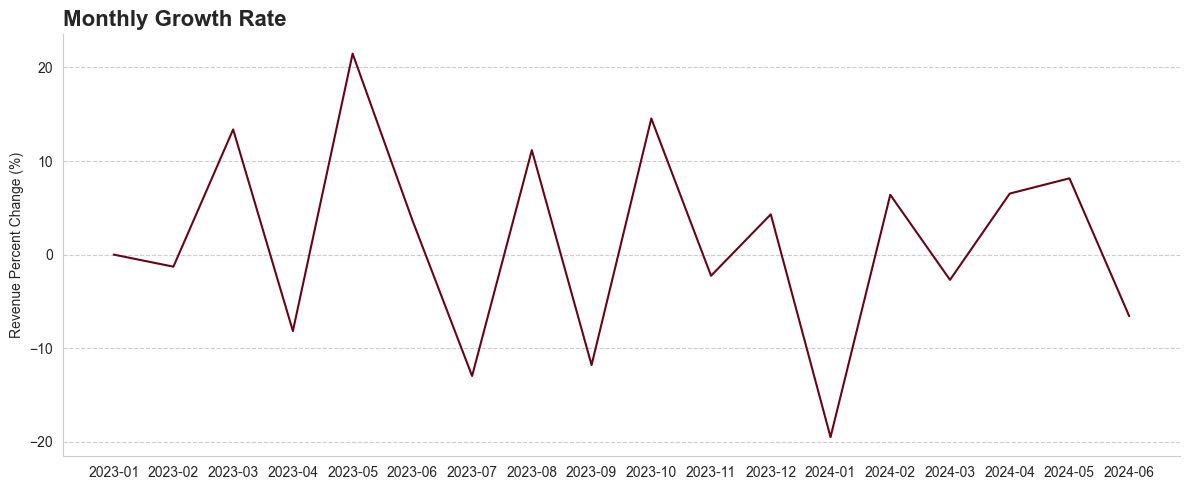

In [364]:
# Visualization
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sns.lineplot(data = summary_sale, y = 'Revenue Percent Change (%)', x = 'Month Key' , color = "#640616")
plt.grid(axis = 'y', linestyle ='--')
sns.despine(left=False, bottom=False)
plt.xlabel("")
plt.title('Monthly Growth Rate', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
plt.show()

In [365]:
print('Average Monthly Grow Rate:',round(summary_sale['Revenue Percent Change (%)'].mean(),2),"%")

Average Monthly Grow Rate: 1.35 %


In [366]:
'''
Observations:
- General Trend: The chart shows an increasing trend in the growth rate throughout 2023, followed by fluctuations in 2024.
- Fluctuations: There are significant fluctuations in the monthly growth rate, indicating varying performance across different months in both 2023 and 2024.

Growth Periods:
- Highest Growth Rates in 2023: March (13.37%), May (21.57%), October (14.54%)
- Highest Growth Rates in 2024: April (10.79%), June (8.41%)
- Predicted Reasons for Growth:
+ New Product Launches: Introducing new products could spur interest and sales.
+ Effective Marketing Campaigns: Targeted marketing efforts can drive higher revenue.
+ Seasonal Demand Increase: Certain times of the year naturally see higher demand due to holidays or events.

Slowdown Periods:
- Sharpest Declines in Growth Rate in 2023: July (-12.97%), September (-11.8%)
- Sharpest Declines in Growth Rate in 2024: January (-8.21%), February (-7.34%), June (-14.12%)
- Predicted Reasons for Declines:
+ Increased Competition: More competitors entering the market can affect growth.
+ Changes in Customer Preferences: Shifts in consumer behavior can lead to reduced sales.
+ Seasonal Demand Decrease: Some months may experience lower demand due to seasonal factors.
- Seasonal Analysis:
+ Seasonality: The data suggests a seasonal pattern, with higher growth rates typically in the middle and end of the year in 2023 and some peaks in early and mid-2024.
+ Factors Influencing Seasonality:
    Shopping Seasons: Periods like the back-to-school season or holiday shopping can boost sales.
    Holidays: Major holidays often lead to increased consumer spending.
    Business Activities: Specific business cycles or events can drive growth.

Monthly Breakdown:
- 2023:
    January - February: Modest growth rates.
    March: Significant peak at 13.37%.
    April: Minor decline.
    May: Highest peak at 21.57%.
    June: Decline begins.
    July: Sharp decline at -12.97%.
    August: Recovery starts.
    September: Another sharp decline at -11.8%.
    October: High growth at 14.54%.
    November - December: Moderate growth.
- 2024:
    January - February: Declines at -8.21% and -7.34% respectively.
    March: Modest growth.
    April: Significant peak at 10.79%.
    May: Decline.
    June: Sharp decline at -14.12%.
-> The seasonal factors significantly influence the revenue growth of the wine retail industry in Iowa. The data from 2024 indicates that while some seasonal trends continue, there are new fluctuations that need to be addressed with adaptive strategies.
'''

'\nObservations:\n- General Trend: The chart shows an increasing trend in the growth rate throughout 2023, followed by fluctuations in 2024.\n- Fluctuations: There are significant fluctuations in the monthly growth rate, indicating varying performance across different months in both 2023 and 2024.\n\nGrowth Periods:\n- Highest Growth Rates in 2023: March (13.37%), May (21.57%), October (14.54%)\n- Highest Growth Rates in 2024: April (10.79%), June (8.41%)\n- Predicted Reasons for Growth:\n+ New Product Launches: Introducing new products could spur interest and sales.\n+ Effective Marketing Campaigns: Targeted marketing efforts can drive higher revenue.\n+ Seasonal Demand Increase: Certain times of the year naturally see higher demand due to holidays or events.\n\nSlowdown Periods:\n- Sharpest Declines in Growth Rate in 2023: July (-12.97%), September (-11.8%)\n- Sharpest Declines in Growth Rate in 2024: January (-8.21%), February (-7.34%), June (-14.12%)\n- Predicted Reasons for Declin

# Question 3: Is there any seasonal variation in revenue?

In [367]:
# Create Month column from Order Date column
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df.sample(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude,Customer Segment,Total Cost,Month Key,Month
1423827,INV-60508700043,2023-07-20,2130,SYCAMORE CONVENIENCE,617 SYCAMORE,WATERLOO,50703,BLACK HAWK,1081600,WHISKEY LIQUEUR,620,MPL BRANDS NV INC/ PATCO BRANDS,85980,DOUGH BALL COOKIE DOUGH WHISKEY 750 (ml),6,750,17.54,26.31,12,315.72,9.00,2.37,176,-92.33538,42.49784,Champions,210.48,2023-07,7
1623007,INV-61359500001,2023-08-17,2582,HY-VEE #2 FOOD STORE / MASON CITY,551 S ILLINOIS AVE,MASON CITY,50401,CERRO GORDO,1012200,SCOTCH WHISKIES,421,SAZERAC COMPANY INC,10006,SCORESBY RARE SCOTCH 750 (ml),12,750,6.25,9.38,3,28.14,2.25,0.59,1373,-93.17116,43.14639,Champions,18.75,2023-08,8
2820020,INV-66758700008,2024-01-30,3690,TARGET STORE T-1792 / WATERLOO,1501 E SAN MARNAN,WATERLOO,50702,BLACK HAWK,1081200,CREAM LIQUEURS,260,DIAGEO AMERICAS,68039,BAILEYS ORIGINAL IRISH CREAM 100ML 2400 (ml),4,2400,41.76,62.64,4,250.56,9.60,2.53,176,-92.32519,42.46459,Big Spenders,167.04,2024-01,1


In [368]:
# Create transform function from month to season 
def convert_month(month):
    if month == 1 or month == 2 or month == 3:
        return 'Spring'
    elif month == 4 or month == 5 or month == 6:
        return 'Summer'
    elif month == 7 or month == 8 or month == 9:
        return 'Autumn'
    else:
        return 'Winter'

In [369]:
# Create Season column by convert_month function
df['Season'] = df['Month'].apply(lambda x: convert_month(x))

In [370]:
# Check sample data
df.sample(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),US Counties,Store Longitude,Store Latitude,Customer Segment,Total Cost,Month Key,Month,Season
906495,INV-58383400043,2023-05-12,2518,HY-VEE WINE AND SPIRITS (1544) / RED OAK,1607 NORTH BROADWAY,RED OAK,51566,MONTGOMERY,1071000,COCKTAILS/RTD,421,SAZERAC COMPANY INC,57174,CHI-CHI'S SKINNY MARGARITA 1750 (ml),6,1750,6.50,9.75,6,58.50,10.5,2.77,1834,-95.23278,41.01865,Champions,39.00,2023-05,5,Summer
231561,INV-55546000004,2023-02-03,5355,CASEY'S GENERAL STORE # 3523/ ELDRIDGE,26701 SCOTT PARK RD.,ELDRIDGE,52748,SCOTT,1012100,CANADIAN WHISKIES,260,DIAGEO AMERICAS,10805,CROWN ROYAL REGAL APPLE 375 (ml),24,375,8.49,12.74,24,305.76,9.0,2.37,1881,-90.54906,41.69482,Big Spenders,203.76,2023-02,2,Spring
2019391,INV-63219600034,2023-10-12,3456,QUICK SHOP / CLEAR LAKE,904 N 8TH ST,CLEARLAKE,50428,CERRO GORDO,1032100,IMPORTED VODKAS,35,BACARDI USA INC,34433,GREY GOOSE 750 (ml),12,750,15.50,23.25,2,46.50,1.5,0.39,1373,-93.37880,43.14286,Champions,31.00,2023-10,10,Winter


In [371]:
# Group Sale by Season
revenue_season = df.groupby('Season')['Sale (Dollars)'].sum().reset_index()
revenue_season

,Season,Sale (Dollars)
0,Autumn,1.108170e+08
1,Spring,2.012048e+08
2,Summer,2.262114e+08
3,Winter,1.206141e+08


In [372]:
# Order the Season column
revenue_season['Season'] = pd.Categorical(revenue_season['Season'], categories = ["Spring", "Summer", "Autumn", "Winter"], ordered = True)

# Sort df by the Season column
revenue_season = revenue_season.sort_values(by = "Season")

# Convert from Dollars to Million Dollars
revenue_season['Sale (Dollars)'] = round((revenue_season['Sale (Dollars)'] / 1000000),2)

# Rename Sale (Dollars) to Revenue (Million Dollars)
revenue_season = revenue_season.rename(columns = {'Sale (Dollars)' : 'Revenue (Million Dollars)'})
revenue_season

,Season,Revenue (Million Dollars)
1,Spring,201.20
2,Summer,226.21
0,Autumn,110.82
3,Winter,120.61


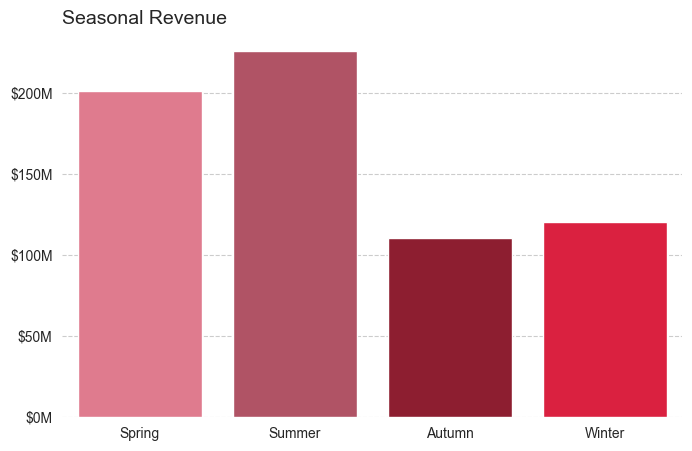

In [373]:
plt.figure(figsize= (8,5))
sns.barplot(data = revenue_season, x = 'Season', y = 'Revenue (Million Dollars)', dodge=False, palette= ['#ef6b84', '#bf445b', '#a00b24', '#f9022b']) 
plt.title('Seasonal Revenue', loc = 'left', fontsize = 14)
sns.despine(left=True, bottom=True)
plt.xlabel("")
plt.ylabel("")
plt.grid(axis = 'y', linestyle ='--')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x))) 
plt.show()

In [374]:
'''
Trends:
    Summer: The highest revenue, around $200 million, indicates strong demand during this season.
    Spring: Revenue is second highest at approximately $150 million, reflecting an increase in wine consumption.
    Autumn: The lowest revenue, around $100 million, suggests reduced consumption during this season.
    Winter: Although the data is incomplete for winter 2024, current figures show a revenue of about $120 million, indicating significant consumption.

Reasons:
    Summer:
        Warm weather, many people participate in outdoor activities, travel, picnics, leading to increased demand for alcohol consumption in these activities.
        Holidays and festivals such as Memorial Day, Independence Day, Labor Day encourage gatherings, eating, and drinking.   
    Winter:
        Cold weather makes people tend to stay at home, gather with friends and family, bringing the possibility of using alcohol to keep warm.
        Major holidays close together like Thanksgiving, Christmas, and New Year's Day are also occasions for people to consume and push alcohol sales to the highest level in winter compared to the other three seasons of the year. In addition, on these major holidays, in addition to personal consumption needs, there is also the use of alcohol as gifts, which is when higher quality (higher priced) wines are preferred. 
    Spring and Fall: The weather is somewhat mild, with fewer holidays, leading to decreased demand for alcohol.
-> It can be seen that after a series of long major holidays in winter that drive up alcohol consumption, spring is when people focus on getting back to work for the new year, and from there the demand for alcohol decreases significantly. Then the market gradually stabilizes in the two mid-seasons (not much difference between summer and autumn) and starts to increase strongly again in winter. This is like the alcohol consumption cycle in Iowa that the dataset shows.

Recommendations:
    Increase order quantities in summer and winter to meet high demand, while reducing order quantities in spring and autumn (2 seasons with low consumption). Thereby optimizing inventory costs and avoiding excess inventory.
'''

"\nTrends:\n    Summer: The highest revenue, around $200 million, indicates strong demand during this season.\n    Spring: Revenue is second highest at approximately $150 million, reflecting an increase in wine consumption.\n    Autumn: The lowest revenue, around $100 million, suggests reduced consumption during this season.\n    Winter: Although the data is incomplete for winter 2024, current figures show a revenue of about $120 million, indicating significant consumption.\n\nReasons:\n    Summer:\n        Warm weather, many people participate in outdoor activities, travel, picnics, leading to increased demand for alcohol consumption in these activities.\n        Holidays and festivals such as Memorial Day, Independence Day, Labor Day encourage gatherings, eating, and drinking.   \n    Winter:\n        Cold weather makes people tend to stay at home, gather with friends and family, bringing the possibility of using alcohol to keep warm.\n        Major holidays close together like Thank

# Dimension: Order

# Question 4: How many orders are placed each month?

In [375]:
# Group Year Month by Invoice Number
month_invoice = df.groupby('Month Key')['Invoice Number'].count().reset_index()
month_invoice

,Month Key,Invoice Number
0,2023-01,207866
1,2023-02,184860
2,2023-03,215066
3,2023-04,197446
4,2023-05,233050
5,2023-06,247139
6,2023-07,208478
7,2023-08,230027
8,2023-09,208929
9,2023-10,220589


In [445]:
print('Total Invoice:',month_invoice['Invoice Number'].sum())

Total Invoice: 3885075


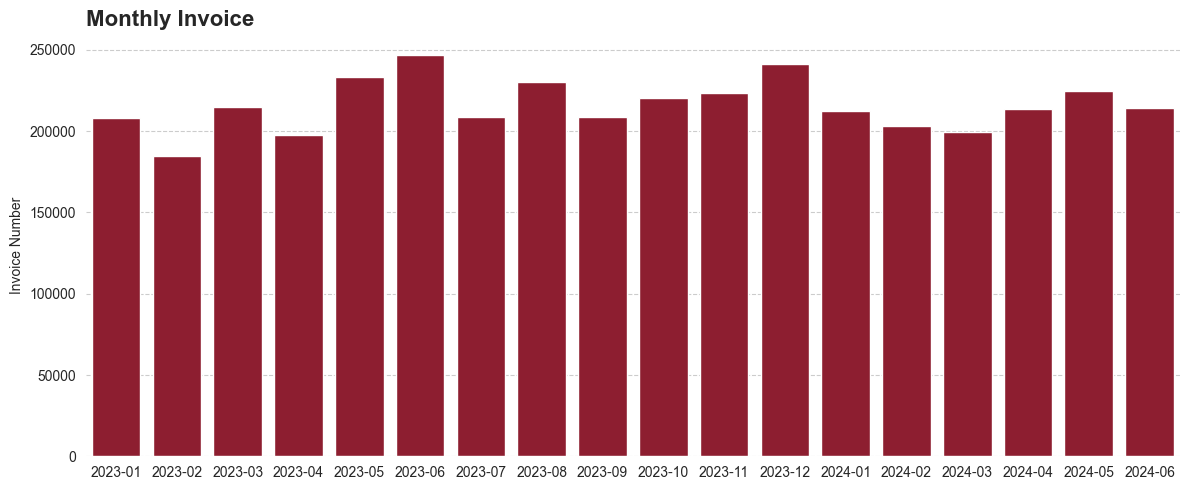

In [376]:
# Visualization
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sns.barplot(data = month_invoice, y = 'Invoice Number', x = 'Month Key', color = "#a00b24")
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel("")
sns.despine(left=True, bottom=True)
plt.title('Monthly Invoice', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
# plt.show()

In [377]:
'''
There were a total of 3885075 wine order, of which:
    Overall Trend: The total number of invoices shows a gradual increase from the beginning of the year, with notable spikes in mid-year (particularly in June) and again towards the end of the year (December).
    Monthly Peaks: June marked the highest number of invoices, aligning with the peak demand seen in summer. February recorded the lowest number of invoices, reflecting the typical seasonal decline in wine orders early in the year.
    Correlation: There is a clear correlation between revenue and order volume. Months with higher invoice numbers tend to coincide with increased revenue, suggesting a linear relationship between these two metrics.

Detailed Insights
    Seasonal Patterns: The data indicates that the demand for wine tends to rise during summer and winter months, paralleling the trends observed in revenue.
    Key Months: The spring months (April and May) show a steady increase leading into the summer peak. The subsequent months maintain relatively high order volumes, particularly in December due to holiday celebrations.
-> The data suggests a cyclical pattern of wine demand influenced by seasonal factors. This insight can inform inventory management and marketing strategies, ensuring that stock levels align with anticipated order volumes throughout the year.
'''

'\nOverall Trend: The total number of invoices shows a gradual increase from the beginning of the year, with notable spikes in mid-year (particularly in June) and again towards the end of the year (December).\nMonthly Peaks: June marked the highest number of invoices, aligning with the peak demand seen in summer. February recorded the lowest number of invoices, reflecting the typical seasonal decline in wine orders early in the year.\nCorrelation: Similar to Chart 1, there is a clear correlation between revenue and order volume. Months with higher invoice numbers tend to coincide with increased revenue, suggesting a linear relationship between these two metrics.\n\nDetailed Insights\nSeasonal Patterns: The data indicates that the demand for wine tends to rise during summer and winter months, paralleling the trends observed in revenue.\nKey Months: The spring months (April and May) show a steady increase leading into the summer peak. The subsequent months maintain relatively high order 

# Question 5: What is the average revenue per order?

In [378]:
avg_order_revenue = df.groupby(['Month Key'])['Sale (Dollars)'].mean().reset_index()
avg_order_revenue['Sale (Dollars)'] = round(avg_order_revenue['Sale (Dollars)'],0)
avg_order_revenue = avg_order_revenue.rename(columns = {'Sale (Dollars)' : 'Revenue (Dollars)'})
avg_order_revenue

,Month Key,Revenue (Dollars)
0,2023-01,153.0
1,2023-02,170.0
2,2023-03,166.0
3,2023-04,166.0
4,2023-05,170.0
5,2023-06,167.0
6,2023-07,172.0
7,2023-08,173.0
8,2023-09,168.0
9,2023-10,182.0


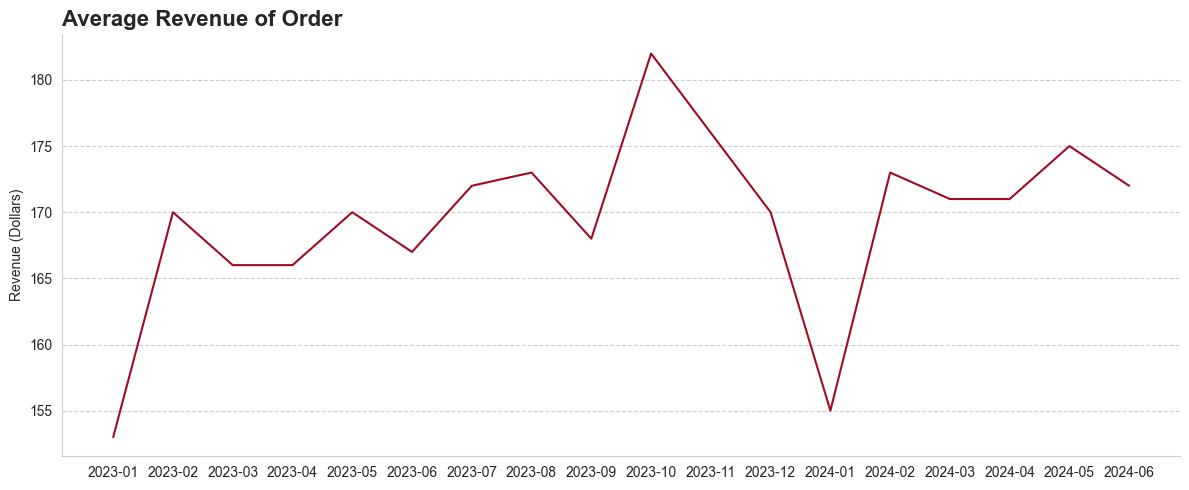

In [379]:
# Visualization
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sns.lineplot(data = avg_order_revenue, y = 'Revenue (Dollars)', x = 'Month Key', color = "#a00b24")
plt.grid(axis = 'y', linestyle ='--')
sns.despine(left=False, bottom=False)
plt.xlabel("")
plt.title('Average Revenue of Order', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
plt.show()

In [380]:
'''
Stable Average Revenue: The average value of wine orders shows relative stability, with minor fluctuations over the months.
Significant Variations: There are noticeable peaks, particularly in early 2023 (February) and again in mid-2023 (June), with the highest average revenue reaching around $180.
Seasonal Impact: Unlike the order volume, the average order value does not exhibit a strong seasonal dependency, indicating that while order frequency may increase during peak seasons, the average value per order remains consistent.

Insights
    Ordering Behavior: The data suggests that customers are likely placing more frequent orders during high-demand periods (summer and winter) rather than increasing the size of individual orders. This aligns with previous analyses regarding the importance of optimizing inventory costs.
    Cost Implications: The stability in average order value, despite fluctuations in order quantity, indicates that while revenue may increase due to higher order frequency, shipping costs could rise as well. This highlights a critical cost management issue, as more frequent, smaller orders may lead to higher transportation expenses.

Recommendations
    Threshold Analysis: Conduct an analysis to identify an optimal order threshold. Orders below a certain value may incur higher shipping costs, while larger orders could benefit from reduced transportation fees.
    Incentive Programs: During peak seasons, implement promotional strategies to encourage customers to increase their order sizes. This could include discounts, free shipping for larger orders, or loyalty programs to foster higher average order values.
    Monitor Trends: Continue to track average order values closely to identify any emerging trends that could inform inventory and pricing strategies.
'''

'\nStable Average Revenue: The average value of wine orders shows relative stability, with minor fluctuations over the months.\nSignificant Variations: There are noticeable peaks, particularly in early 2023 (February) and again in mid-2023 (June), with the highest average revenue reaching around $180.\nSeasonal Impact: Unlike the order volume, the average order value does not exhibit a strong seasonal dependency, indicating that while order frequency may increase during peak seasons, the average value per order remains consistent.\n\nInsights\n    Ordering Behavior: The data suggests that customers are likely placing more frequent orders during high-demand periods (summer and winter) rather than increasing the size of individual orders. This aligns with previous analyses regarding the importance of optimizing inventory costs.\n    Cost Implications: The stability in average order value, despite fluctuations in order quantity, indicates that while revenue may increase due to higher orde

# Dimension: Customer

# Question 6: How many monthly active customers (MACs) are there?

In [381]:
# Group Active Customers by Month
active_customer = df.groupby('Month Key')['Store Name'].nunique().reset_index()
active_customer = active_customer.rename(columns = {'Store Name' : 'Active Customers'})
active_customer

,Month Key,Active Customers
0,2023-01,1797
1,2023-02,1764
2,2023-03,1798
3,2023-04,1812
4,2023-05,1875
5,2023-06,1897
6,2023-07,1868
7,2023-08,1894
8,2023-09,1887
9,2023-10,1879


In [382]:
print('Total Customers:', df['Store Name'].nunique())

Total Customers: 2158


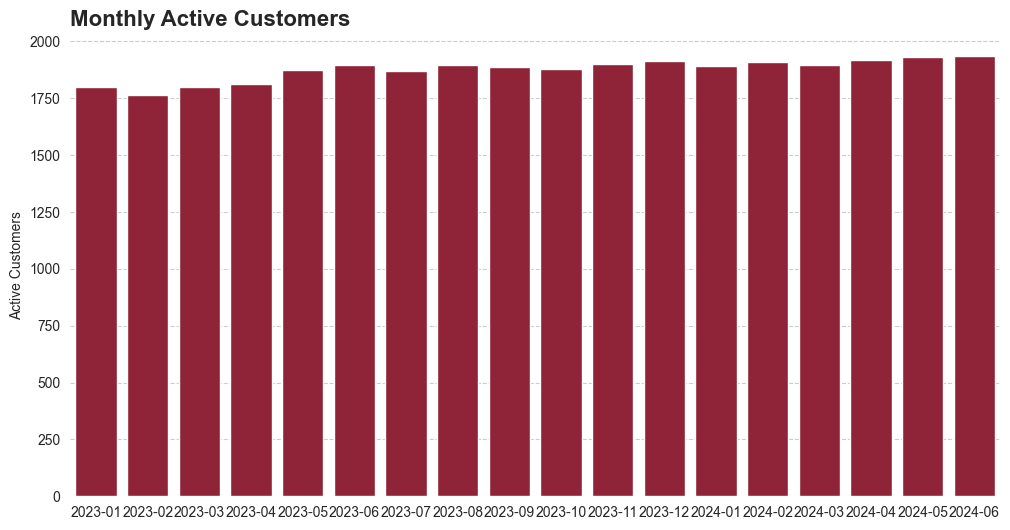

In [383]:
plt.figure(figsize= (12,6))
sns.barplot(data = active_customer, x = 'Month Key', y = 'Active Customers', dodge=False, color = '#a1112c') 
plt.title('Monthly Active Customers', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel("")
plt.grid(axis = 'y', linestyle ='--')
plt.show()

In [384]:
'''
We currently have a total of 2,158 customers. The number of active customers per month remains relatively high throughout 2023 and the before half of 2024, ranging from approximately 1,800 to 1,900 customers per month.
The positive aspect above is largely due to the fact that the majority of our customers are retail stores in the state. Additionally, as we are the only wine distributor in the state, most of the stores that sell wine will continue to consume our wine for most of their business lifecycle.
'''

'\nWe currently have a total of 2,158 customers. The number of active customers per month remains relatively high throughout 2023 and the before half of 2024, ranging from approximately 1,800 to 1,900 customers per month.\nThe positive aspect above is largely due to the fact that the majority of our customers are retail stores in the state. Additionally, as we are the only wine distributor in the state, most of the stores that sell wine will continue to consume our wine for most of their business lifecycle.\n'

# Question 7: What is the monthly retention rate (MRR)?

In [385]:
# Group 'Sale (Dollars)' of each 'Store Name' by 'Month'.
cus_purchase_month = df.groupby(['Store Name', 'Month Key'])['Sale (Dollars)'].sum().reset_index()
cus_purchase_month = cus_purchase_month.rename(columns = {'Sale (Dollars)' : 'Revenue ($)'})
cus_purchase_month.sort_values(by = 'Store Name')

,Store Name,Month Key,Revenue ($)
0,10TH HOLE INN & SUITE / GIFT SHOP,2023-01,3012.05
1,10TH HOLE INN & SUITE / GIFT SHOP,2023-05,1600.97
2,10TH HOLE INN & SUITE / GIFT SHOP,2023-08,1470.32
3,10TH HOLE INN & SUITE / GIFT SHOP,2023-11,1182.89
4,10TH HOLE INN & SUITE / GIFT SHOP,2024-03,1460.10
...,...,...,...
33755,YOUR PRIVATE BAR / URBANDALE,2023-03,819.18
33756,YOUR PRIVATE BAR / URBANDALE,2023-04,1732.20
33757,YOUR PRIVATE BAR / URBANDALE,2023-06,2905.27
33758,YOUR PRIVATE BAR / URBANDALE,2023-07,314.88


In [386]:
# Month with value 1 is a month with purchase, 0 is no purchase
df_retention = pd.crosstab(cus_purchase_month['Store Name'], cus_purchase_month['Month Key'])
df_retention = df_retention.rename_axis(None, axis = 1).reset_index()
df_retention.columns = df_retention.columns.astype('str')
df_retention

,Store Name,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06
0,10TH HOLE INN & SUITE / GIFT SHOP,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,173 CRAFT DISTILLERY (ET),1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1
2,1ST STOP BEVERAGE SHOP,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,218 FUEL EXPRESS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,380BP / SWISHER,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,YESWAY STORE # 1029/ CLARION,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2154,YESWAY STORE # 1036/ KANAWHA,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1
2155,YESWAY STORE #1037/ GRIMES,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2156,YESWAY STORE #1198 / SWEA CITY,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1


In [387]:
# Get list months
months = df_retention.columns[1:]
months

Index(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06'],
      dtype='object')

In [388]:
# Create a retention list, where each element is a dictionary with 3 keys: 'Month Key', 'Total Customers', and 'Retained Customers'.
# We will not calculate for Month 1 since there is no previous month data.
retention_array = []

# Run the loop 
for i in range(len(months) - 1):
    # Create an empty dictionary to assign new data to each iteration
    retention_data = {}

    # Get the current month, starting from Month 2 and increasing with each iteration
    selected_month = months[i+1]

    # Get the previous adjacent month
    prev_month = months[i]

    # Create a key 'Invoice Year Month' with a value of the current month
    retention_data['Month Key'] = selected_month

    # Create a key 'Total Customers Count' with a value of the total number of customers who made a purchase in the current month
    retention_data['Total Customers'] = df_retention[selected_month].sum()

    # Create a key 'Retained Customers Count' with a value of the total number of customers who made a purchase in the current month and also made a purchase in the previous adjacent month
    retention_data['Retained Customers'] = df_retention[(df_retention[selected_month] == 1) & (df_retention[prev_month] == 1)][selected_month].sum()

    # Add the dictionary to the previously created retention list
    retention_array.append(retention_data)
    print("**********************************************************" + selected_month + "**********************************************************")
    print(retention_array, '\n')

**********************************************************2023-02**********************************************************
[{'Month Key': '2023-02', 'Total Customers': np.int64(1764), 'Retained Customers': np.int64(1693)}] 

**********************************************************2023-03**********************************************************
[{'Month Key': '2023-02', 'Total Customers': np.int64(1764), 'Retained Customers': np.int64(1693)}, {'Month Key': '2023-03', 'Total Customers': np.int64(1798), 'Retained Customers': np.int64(1691)}] 

**********************************************************2023-04**********************************************************
[{'Month Key': '2023-02', 'Total Customers': np.int64(1764), 'Retained Customers': np.int64(1693)}, {'Month Key': '2023-03', 'Total Customers': np.int64(1798), 'Retained Customers': np.int64(1691)}, {'Month Key': '2023-04', 'Total Customers': np.int64(1812), 'Retained Customers': np.int64(1697)}] 

*************************

In [389]:
# Create the retention dataframe using the data in the retention_array
retention = pd.DataFrame(retention_array)

# Calculate the Retention Rate as follows:
#     Customers Retention Rate = (Retained Customers / Total Customers) * 100
# Where:
#     Retained Customers are customers who made a purchase in the previous adjacent month and continue to make a purchase in the current month.
#     Total Customers is the total number of customers in the current month (including customers from the previous month who continue to purchase in the current month and new customers who purchase in the current month).
retention['Customers Retention Rate (%)'] = round((retention['Retained Customers'] / retention['Total Customers']) * 100, 2)
retention

,Month Key,Total Customers,Retained Customers,Customers Retention Rate (%)
0,2023-02,1764,1693,95.98
1,2023-03,1798,1691,94.05
2,2023-04,1812,1697,93.65
3,2023-05,1875,1742,92.91
4,2023-06,1897,1809,95.36
5,2023-07,1868,1806,96.68
6,2023-08,1894,1803,95.20
7,2023-09,1887,1807,95.76
8,2023-10,1879,1800,95.80
9,2023-11,1898,1796,94.63


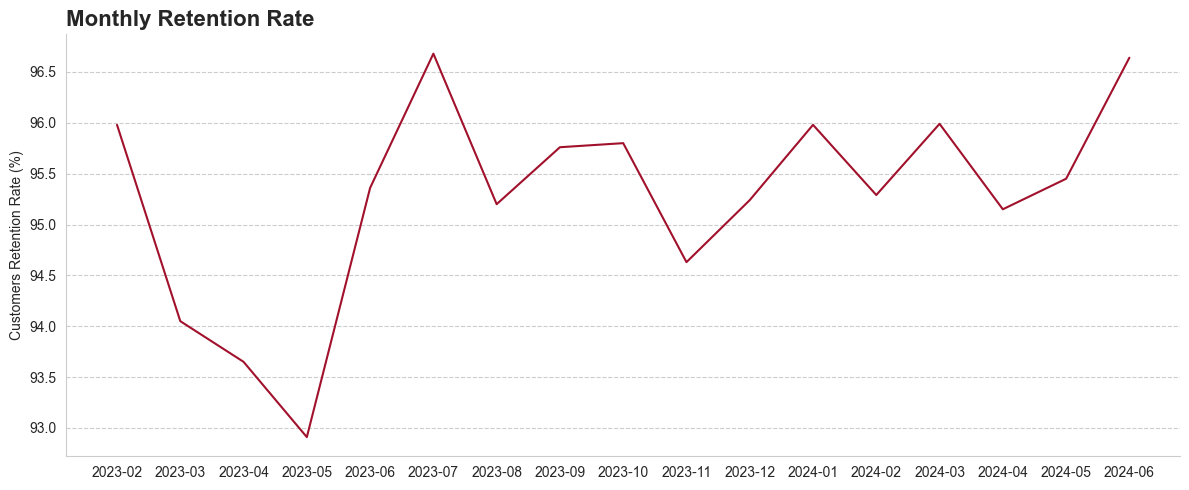

In [390]:
# Visualization
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sns.lineplot(data = retention, y = retention['Customers Retention Rate (%)'], x = 'Month Key', color = "#a1112c")
plt.grid(axis = 'y', linestyle ='--')
sns.despine(left=False, bottom=False)
plt.xlabel("")
plt.title('Monthly Retention Rate', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
plt.show()

In [391]:
'''
Observations:
- Overall Trend: Customer retention rate fluctuates between 93% and 96.5%.
    Low: May 2023, retention rate drops below 93%.
    High: June 2023 and June 2024, retention rate peaks at around 96.5%.

- Details:
    February 2023: Starts with retention rate around 96%, then declines.
    March to May 2023: Retention rate declines steadily, reaching its lowest point in May.
    June 2023: Retention rate rebounds sharply, reaching its highest level of the year.
    July to December 2023: Retention rates fluctuate, remaining at an average of 94% to 95%.
    January to June 2024: Retention rates continue to fluctuate, with a significant increase in June 2024.

- Cause Analysis:
    February to May 2023: The decline may be due to factors not included in the data such as seasonality, reduced consumer spending, or ineffective marketing campaigns.
    June 2023: The sharp increase may be the result of more effective marketing campaigns or special events driving consumption.
    July to December 2023: The stability in customer retention rates suggests that Iowa's wine distribution system is operating effectively.
    January to June 2024: Steady growth, especially in June 2024, may be due to improved customer service strategies or effective promotions.

- Recommendations:
    Improve Marketing Strategy: To maintain and improve customer retention, focus on more effective marketing strategies during low retention months (such as March to May).
    Root Cause Analysis: Conduct research to better understand the factors that influence customer retention, especially during March to May.
    Improve Customer Care: Ensure high-quality customer service, especially during low retention months, to maintain customer satisfaction and loyalty.

-> Customer retention in Iowa shows relatively high stability, with some minor fluctuations. Strong growth in June 2023 and June 2024 is a positive sign, however, continued improvement in strategies during low retention months is needed to maintain stability and sustainable growth.
'''

"\nObservations:\n- Overall Trend: Customer retention rate fluctuates between 93% and 96.5%.\n    Low: May 2023, retention rate drops below 93%.\n    High: June 2023 and June 2024, retention rate peaks at around 96.5%.\n\n- Details:\n    February 2023: Starts with retention rate around 96%, then declines.\n    March to May 2023: Retention rate declines steadily, reaching its lowest point in May.\n    June 2023: Retention rate rebounds sharply, reaching its highest level of the year.\n    July to December 2023: Retention rates fluctuate, remaining at an average of 94% to 95%.\n    January to June 2024: Retention rates continue to fluctuate, with a significant increase in June 2024.\n\n- Cause Analysis:\n    February to May 2023: The decline may be due to factors not included in the data such as seasonality, reduced consumer spending, or ineffective marketing campaigns.\n    June 2023: The sharp increase may be the result of more effective marketing campaigns or special events driving co

# Question 8: What is the revenue and profit per customer?

In [392]:
# Create Cost of each Store dataframe
cost_data = df.groupby(['Store Name'])['Total Cost'].sum().to_frame().reset_index()
cost_data = cost_data.rename(columns = {'Total Cost' : 'Cost'})

# Create Revenue of each Store dataframe
revenue_data = df.groupby(['Store Name'])['Sale (Dollars)'].sum().to_frame().reset_index()
revenue_data = revenue_data.rename(columns = {'Sale (Dollars)' : 'Revenue'})

# Merge Cost df with Revenue df to one
summary_customers = cost_data.merge(revenue_data, on = 'Store Name')

# Calculate Profit
summary_customers['Profit'] = summary_customers['Revenue'] - summary_customers['Cost']
summary_customers = summary_customers.sort_values(by = 'Profit', ascending = False)
summary_customers.reset_index(drop = True, inplace = True)
summary_customers

,Store Name,Cost,Revenue,Profit
0,HY-VEE FOOD STORE #3 (1142) / DES MOINES,16509236.16,24749608.44,8240372.28
1,CENTRAL CITY 2 #1501,13809053.93,20707311.07,6898257.14
2,ANOTHER ROUND / DEWITT,6877125.04,10312119.62,3434994.58
3,HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY,5998484.85,8993213.69,2994728.84
4,BENZ DISTRIBUTING,5185286.88,7777071.26,2591784.38
...,...,...,...,...
2153,MOES MART #13 / CASEY,705.12,1057.68,352.56
2154,MALIK'S #1 / MASON CITY,495.55,743.35,247.80
2155,WILDCAT DISTILLING / DUNCOMBE,360.00,540.00,180.00
2156,MALIK'S #2 / MASON CITY,285.86,428.85,142.99


In [393]:
# Sum profit all of stores
total_profit = summary_customers['Profit'].sum()

# Calculate the cumulative profit and the corresponding number of stores
cumulative_profit = 0
num_stores_for_90_percent_profit = 0
stores_for_90_percent_profit = []

for index, row in summary_customers.iterrows():
    cumulative_profit += row['Profit']
    num_stores_for_90_percent_profit += 1
    stores_for_90_percent_profit.append({'Store Name': row['Store Name'], 'Profit': row['Profit']})
    if cumulative_profit > 0.9 * total_profit:
        break

# Create new DataFrame from list stores create 90% profit
df_90_percent_profit = pd.DataFrame(stores_for_90_percent_profit)

print("Number of Stores create 90% profit:", num_stores_for_90_percent_profit)
print("The new DataFrame contain stores information create 90% profit:")
print(df_90_percent_profit)

Number of Stores create 90% profit: 1026
The new DataFrame contain stores information create 90% profit:
                                         Store Name      Profit
0          HY-VEE FOOD STORE #3 (1142) / DES MOINES  8240372.28
1                              CENTRAL CITY 2 #1501  6898257.14
2                            ANOTHER ROUND / DEWITT  3434994.58
3     HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY  2994728.84
4                                 BENZ DISTRIBUTING  2591784.38
...                                             ...         ...
1021                              THE SECRET CELLAR    37264.97
1022                   KWIK SHOP #520 / CARTER LAKE    37232.67
1023     CASEY'S GENERAL STORE #3896 / CENTER POINT    37224.16
1024                           MCNALLY'S SUPER VALU    37210.69
1025              TARGET STORE T-2526 / CEDAR FALLS    37193.00

[1026 rows x 2 columns]


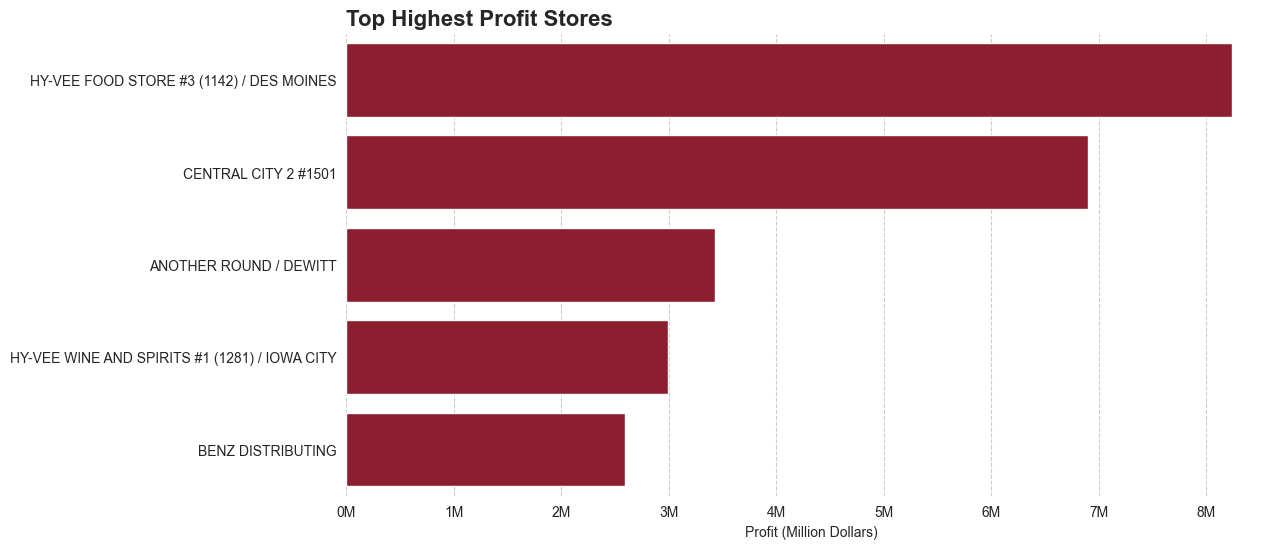

In [394]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df_90_percent_profit.head(5), y = 'Store Name', x = round(df_90_percent_profit['Profit']/1000000,2), color = '#a00b24')
plt.title('Top Highest Profit Stores', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x))) 
sns.despine(left=True, bottom=True)
plt.xlabel("Profit (Million Dollars)")
plt.ylabel("")
plt.grid(axis = 'x', linestyle ='--')
plt.show()

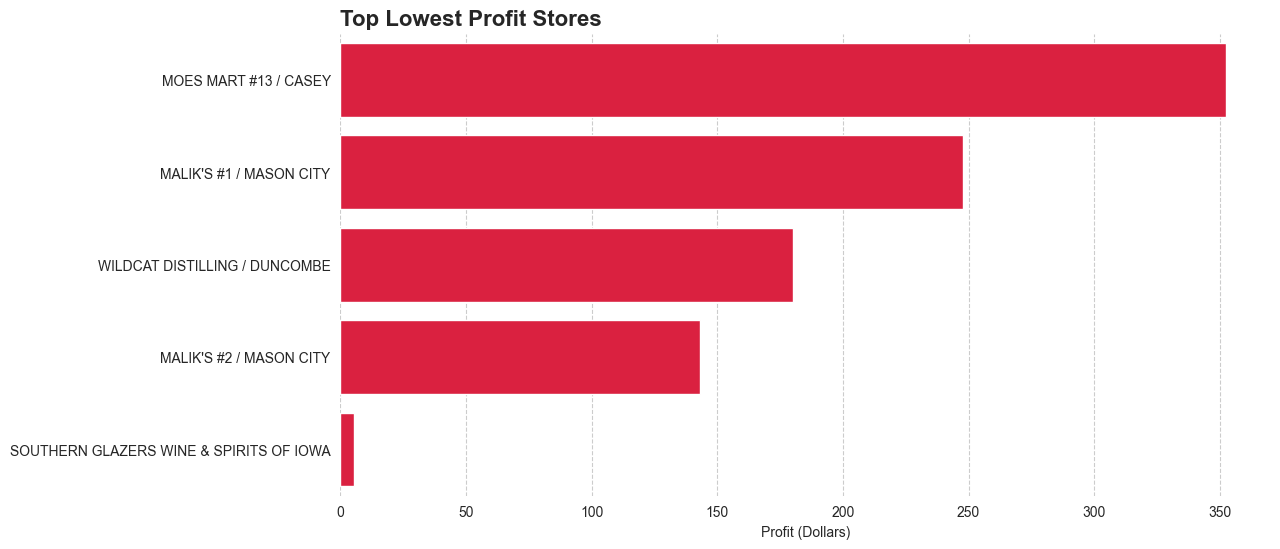

In [395]:
plt.figure(figsize = (12, 6))
sns.barplot(data = summary_customers.tail(5), y = 'Store Name', x = 'Profit', color = '#f9022b')
plt.title('Top Lowest Profit Stores', loc = 'left',  fontweight = 'heavy', fontsize = 16)
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x))) 
sns.despine(left=True, bottom=True)
plt.xlabel("Profit (Dollars)")
plt.ylabel("")
plt.grid(axis = 'x', linestyle ='--')
plt.show()

In [396]:
'''
HY-VEE #3 and CENTRAL CITY 2 are the top two profit-generating customers, exceeding the 8 million dollar from 2023 to 30/6/2024.
On the other hand, there are customers who seem to only purchase once and show no signs of returning, as evidenced by the extremely low profit generated from these customers. Examples include SOUTHERN GLAZERS WINE & SPIRITS with less than 50 and Makil's #2 with aroud 150.
70.
'''

"\nHY-VEE #3 and CENTRAL CITY 2 are the top two profit-generating customers, exceeding the 8 million dollar from 2023 to 30/6/2024.\nOn the other hand, there are customers who seem to only purchase once and show no signs of returning, as evidenced by the extremely low profit generated from these customers. Examples include SOUTHERN GLAZERS WINE & SPIRITS with less than 50 and Makil's #2 with aroud 150.\n70.\n"

# Question 9: What is the revenue and profit per customer segment?


In [397]:
summary_customers = pd.merge(summary_customers,df[['Store Name', 'County', 'Customer Segment']], on = 'Store Name', how = 'left')
summary_customers = summary_customers.drop_duplicates().reset_index(drop = True)

summary_segment = summary_customers.groupby('Customer Segment').agg({"Cost" : "sum", "Revenue" : "sum", "Profit" : "sum", "Store Name" : "count"})
summary_segment.sort_values(by = 'Profit', ascending= True, inplace= True)
summary_segment.reset_index(inplace = True)
summary_segment = summary_segment.rename(columns = {'Store Name' : 'Number Customers'})
summary_segment

,Customer Segment,Cost,Revenue,Profit,Number Customers
0,Need Attention,9.331766e+06,1.396606e+07,4.634295e+06,422
1,Potential Loyalist,3.302687e+07,4.944143e+07,1.641456e+07,279
2,Big Spenders,7.042577e+07,1.053623e+08,3.493654e+07,955
3,Champions,3.270760e+08,4.900775e+08,1.630014e+08,502


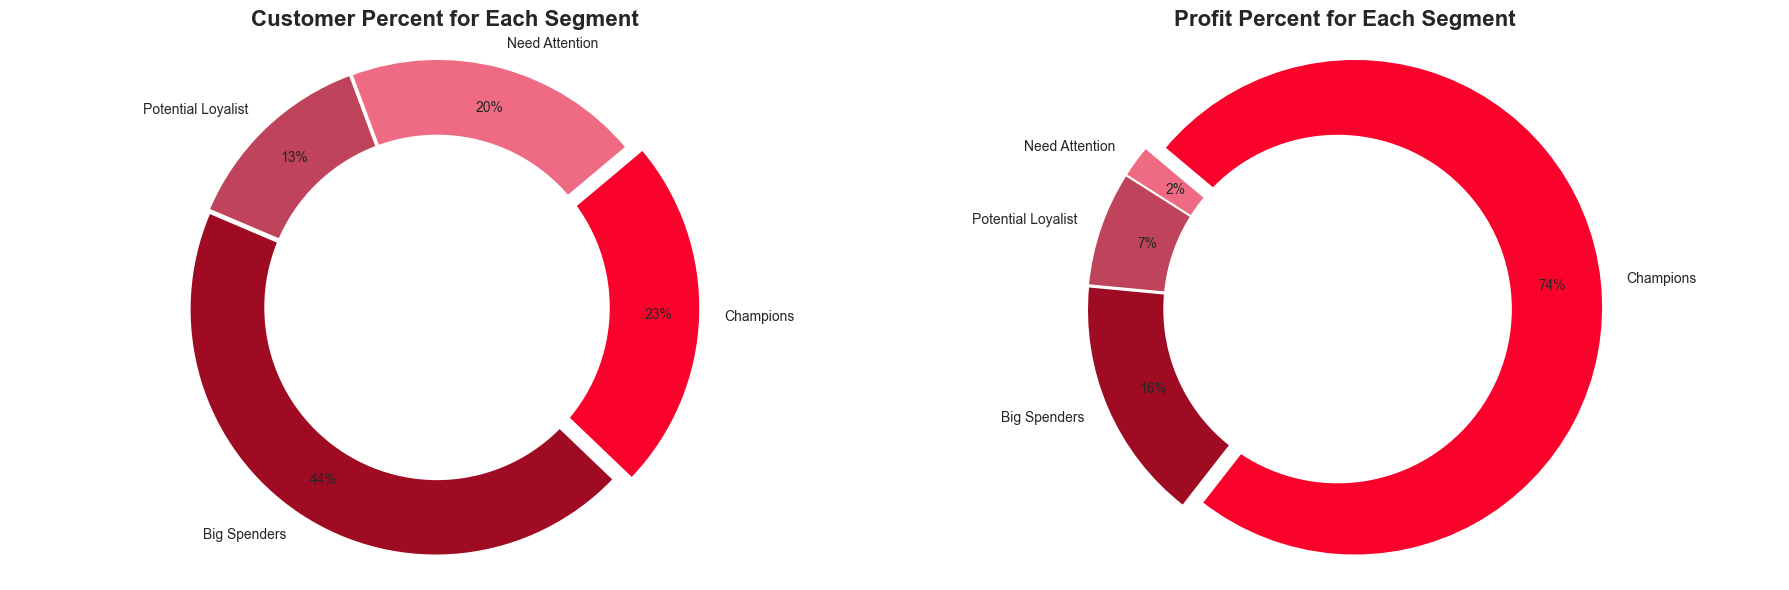

In [398]:
import matplotlib.pyplot as plt

# Define data for the first pie chart
labels_segment = [(str(summary_segment['Customer Segment'][x])) for x in range(len(summary_segment))]
explode_segment = [0.01, 0.01, 0.01, 0.07]
colors_segment = RFM_color
data_segment = summary_segment['Number Customers']

# Define data for the second pie chart
segments_profit = summary_segment['Customer Segment'].to_numpy()
profits = summary_segment['Profit'].to_numpy()
explode_profit = [0.01, 0.01, 0.01, 0.07]
colors_profit = RFM_color

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# First pie chart
axs[0].pie(data_segment,
           labels=labels_segment,
           autopct='%1.0f%%',
           startangle=40,
           explode=explode_segment,
           pctdistance=0.83,
           colors=colors_segment)
axs[0].set_title('Customer Percent for Each Segment', fontweight='heavy', fontsize=16)
circle1 = plt.Circle(xy=(0, 0), radius=.70, facecolor='white')
axs[0].add_artist(circle1)

# Second pie chart
axs[1].pie(profits,
           labels=segments_profit,
           autopct='%1.0f%%',
           startangle=140,
           pctdistance=0.80,
           colors=colors_profit,
           explode=explode_profit)
axs[1].set_title('Profit Percent for Each Segment', fontweight='heavy', fontsize=16)
circle2 = plt.Circle(xy=(0, 0), radius=.70, facecolor='white')
axs[1].add_artist(circle2)

# Equal aspect ratio ensures a circular pie chart
axs[0].axis('equal')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

In [399]:
'''
Observation:

Customer Segment:
    The "Champions" group accounts for 23% of the total number of customers.
    The "Big Spenders" group accounts for 44% of the total number of customers.
    The "Potential Loyalist" group accounts for 13% of the total number of customers.
    The "Need Attention" group accounts for 20% of the total number of customers.

Profits From Segments:
    The "Champions" group generates 74% of the profits -> reflecting the Pareto principle (80-20)
    The "Big Spenders" group generates 16% of the profits.
    The "Potential Loyalist" group generates 7% of the profits.
    The "Need Attention" group generates 2% of the profits.

Customer Segment:
    Champions: Account for 23% of the total number of customers but contribute a very large part to the profits (74%). This shows that the "Champions" group is the most effective customer group in terms of profits.
    Big Spenders: Account for the largest proportion of total customers (44%), but only contribute 16% to profits. This is a group with potential that needs to be further exploited to increase profit efficiency.
    Potential Loyalist: Account for 13% of total customers and contribute 7% to profits. This group has the potential to convert to "Big Spenders" or "Champions".
    Need Attention: Account for 20% of total customers but only contribute 2% to profits. This is a group that needs attention and improvement to avoid losing potential customers.

Recommendations:
    Increase Customer Conversion: Focus on converting "Big Spenders" and "Potential Loyalist" groups to "Champions" to increase profits.
    Improve marketing and customer care strategies for "Big Spenders" to increase profit ratio from this group.
    Improve the Efficiency of the "Need Attention" Group: Despite accounting for a large proportion of total customers (20%), this group only contributes 2% to profits. Special care and marketing strategies are needed to improve the efficiency of this group and avoid losing potential customers.
    Diversify Marketing Strategy:
        Use different marketing strategies for each customer group to maximize profits from each segment.
        For the "Champions" group, maintain and enhance loyalty programs to retain and encourage spending.

-> The chart shows a high dependence on the "Champions" group in generating profits. To optimize profits, it is necessary to strengthen customer conversion strategies from the "Big Spenders" and "Potential Loyalist" groups to the "Champions" group. At the same time, it is necessary to have a separate strategy for the "Need Attention" group to not miss out on potential growth opportunities.
'''

'\nObservation:\n\nCustomer Segment:\n    The "Champions" group accounts for 23% of the total number of customers.\n    The "Big Spenders" group accounts for 44% of the total number of customers.\n    The "Potential Loyalist" group accounts for 13% of the total number of customers.\n    The "Need Attention" group accounts for 20% of the total number of customers.\n\nProfits From Segments:\n    The "Champions" group generates 74% of the profits -> reflecting the Pareto principle (80-20)\n    The "Big Spenders" group generates 16% of the profits.\n    The "Potential Loyalist" group generates 7% of the profits.\n    The "Need Attention" group generates 2% of the profits.\n\nCustomer Segment:\n    Champions: Account for 23% of the total number of customers but contribute a very large part to the profits (74%). This shows that the "Champions" group is the most effective customer group in terms of profits.\n    Big Spenders: Account for the largest proportion of total customers (44%), but on

# Dimension: Product

# Question 10: What are the top-selling products for the 1.5 year?

In [400]:
number_products = df.groupby('Product Name')[['Bottles Sold']].sum().reset_index()
number_products.sort_values(by = 'Bottles Sold', ascending = False).head()

,Product Name,Bottles Sold
2073,FIREBALL CINNAMON WHISKEY 100 (ml),3548470
2084,FIREBALL CINNAMON WHISKEY MINI SLEEVE 50 (ml),1052593
3477,MCCORMICK 80PRF VODKA PET 375 (ml),853230
5274,TITOS HANDMADE VODKA 1000 (ml),749522
701,BLACK VELVET 1750 (ml),744589


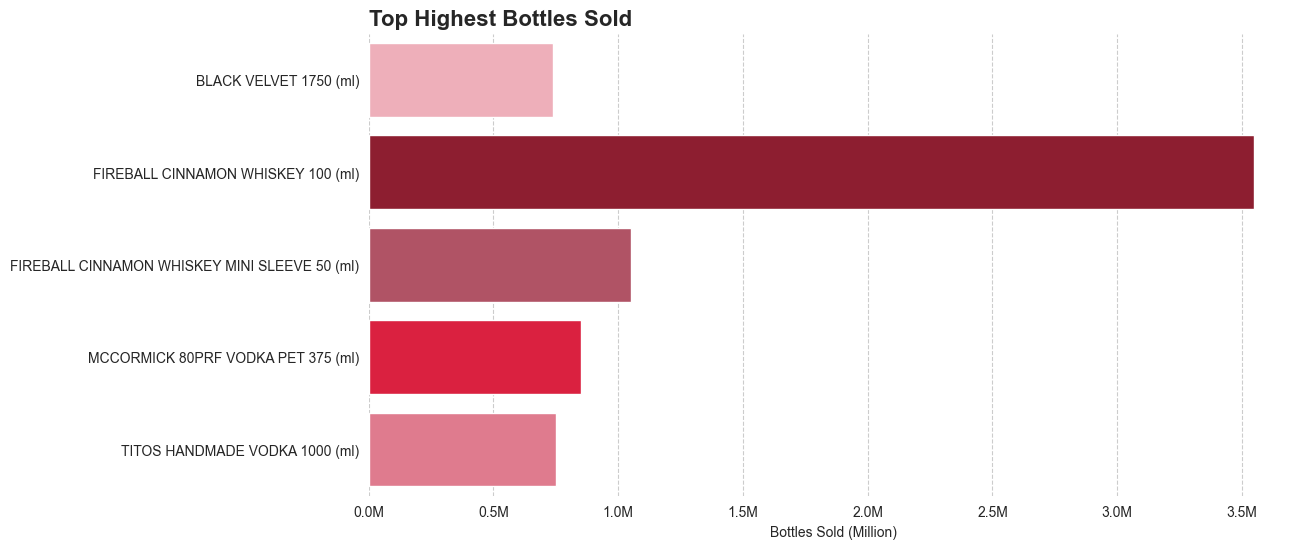

In [401]:
plt.figure(figsize = (12, 6))
sns.barplot(data = number_products.sort_values(by = 'Bottles Sold', ascending = False).head(5), x = round(number_products['Bottles Sold']/1000000,2), y = 'Product Name', palette= ['#f9a4b3', '#a00b24', '#bf445b', '#f9022b', '#ef6b84'])
plt.title('Top Highest Bottles Sold', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x))) 
sns.despine(left=True, bottom=True)
plt.xlabel("Bottles Sold (Million)")
plt.ylabel("")
plt.grid(axis = 'x', linestyle ='--')
plt.show()

In [402]:
number_products.describe()

,Bottles Sold
count,5.701000e+03
mean,8.139245e+03
std,5.881869e+04
min,1.000000e+00
25%,5.100000e+01
50%,4.490000e+02
75%,3.284000e+03
max,3.548470e+06


In [403]:
products_sold_under36 = number_products[number_products['Bottles Sold'] <= 36].reset_index(drop = True)
products_sold_under36.head()

,Product Name,Bottles Sold
0,135 EAST HYOGO JAPANESE GIN 750 (ml),6
1,1921 TEQUILA ANEJO 750 (ml),36
2,1921 TEQUILA BLANCO 750 (ml),36
3,1921 TEQUILA REPOSADO 750 (ml),18
4,3-OAKS DISTILLERY STRAIGHT BOURBON WHISKEY 750...,9


In [404]:
print('Total Bottles Sold:', number_products['Bottles Sold'].sum(), 'Bottles')
print('There are 25% of Total Bottles Sold under 36 bottles:', len(products_sold_under36), 'Products')

Total Bottles Sold: 46401836 Bottles
There are 25% of Total Bottles Sold under 36 bottles: 1235 Products


In [405]:
'''
A total of 5,701 different products were sold in 2023 and the first half of 2024, with a combined total of over 46 million bottles of wine. However, 25% of these products (equivalent to 1,313 products) sold less than 48 bottles in the year.
On the other hand, FIREBALL CINNAMON WHISKEY 100.0 (ml) is considered the product of the year in 2023 and 1/2 of 2024, selling over 3.5 million bottles (3.5 times more than the next closest product), far outperforming the rest of the products.

Recommendations:
Consider discontinuing the import of liquors belonging to the bottom 25% group (those selling less than 36 bottles in a year) to save warehousing costs.
Conduct an in-depth analysis of the top-selling liquors (ingredients, flavor, price, etc.) to find similar products to import in order to maximize profit per product.
'''

'\nA total of 5,701 different products were sold in 2023 and the first half of 2024, with a combined total of over 46 million bottles of wine. However, 25% of these products (equivalent to 1,313 products) sold less than 48 bottles in the year.\nOn the other hand, FIREBALL CINNAMON WHISKEY 100.0 (ml) is considered the product of the year in 2023 and 1/2 of 2024, selling over 3.5 million bottles (3.5 times more than the next closest product), far outperforming the rest of the products.\n\nRecommendations:\nConsider discontinuing the import of liquors belonging to the bottom 25% group (those selling less than 36 bottles in a year) to save warehousing costs.\nConduct an in-depth analysis of the top-selling liquors (ingredients, flavor, price, etc.) to find similar products to import in order to maximize profit per product.\n'

In [406]:
products_summary = df.groupby('Product Name').agg({'Total Cost' : 'sum',
                                                     'Sale (Dollars)' : 'sum'}).reset_index()
products_summary['Profit (Dollars)'] = round(products_summary['Sale (Dollars)'] - products_summary['Total Cost'],2)
products_summary.sort_values(by= 'Profit (Dollars)', ascending = False, inplace= True)
products_summary.head()

,Product Name,Total Cost,Sale (Dollars),Profit (Dollars)
5275,TITOS HANDMADE VODKA 1750 (ml),11443206.00,17164809.00,5721603.00
5274,TITOS HANDMADE VODKA 1000 (ml),9871204.74,14810554.72,4939349.98
701,BLACK VELVET 1750 (ml),8275668.40,12308897.08,4033228.68
1089,CAPTAIN MORGAN ORIGINAL SPICED BARREL 1750 (ml),6898004.64,10304808.47,3406803.83
5278,TITOS HANDMADE VODKA 750 (ml),6455190.00,9682785.00,3227595.00


In [407]:
# Sum profit all of products
products_profit = products_summary['Profit (Dollars)'].sum()

# Calculate the cumulative profit and the corresponding number of products.
cumulative_products = 0
num_products_for_90_percent = 0
products_for_90_percent = []

for index, row in products_summary.iterrows():
    cumulative_products += row['Profit (Dollars)']
    num_products_for_90_percent += 1
    products_for_90_percent.append({'Product Name': row['Product Name'], 'Profit (Dollars)': row['Profit (Dollars)']})
    if cumulative_products > 0.9 * products_profit:
        break

# Create new DataFrame from list products create 90% profit.
df_90_percent_store = pd.DataFrame(products_for_90_percent)

print("We have a total of", products_summary['Product Name'].count(),"products, with 90% of the profit generated by", num_products_for_90_percent, 'products')
print("The new DataFrame contain products information create 90% profit:")
df_90_percent_store.head()

We have a total of 5701 products, with 90% of the profit generated by 1218 products
The new DataFrame contain products information create 90% profit:


,Product Name,Profit (Dollars)
0,TITOS HANDMADE VODKA 1750 (ml),5721603.00
1,TITOS HANDMADE VODKA 1000 (ml),4939349.98
2,BLACK VELVET 1750 (ml),4033228.68
3,CAPTAIN MORGAN ORIGINAL SPICED BARREL 1750 (ml),3406803.83
4,TITOS HANDMADE VODKA 750 (ml),3227595.00


In [408]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

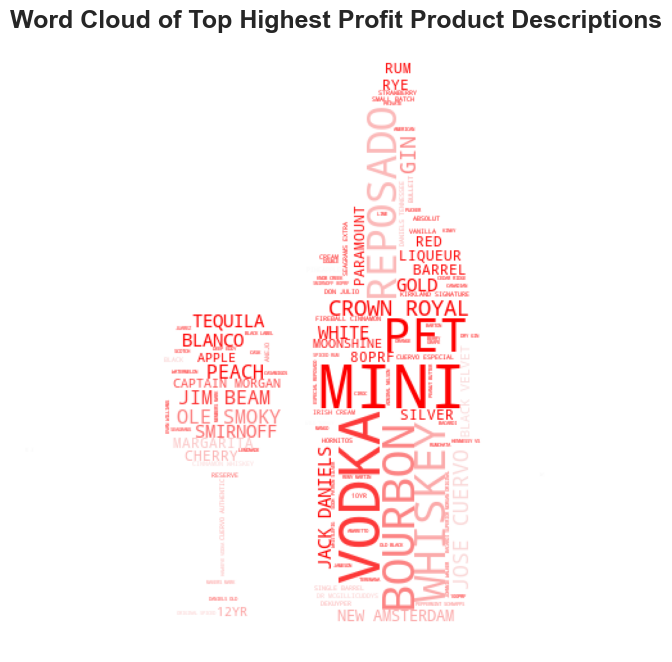

In [409]:
# Combine the names of high-view channels into a single string
text = ' '.join(df_90_percent_store['Product Name'])
text = text.replace("(ml)", "")
# Create the word cloud
mask = np.array(Image.open(requests.get('https://i.pinimg.com/originals/07/7c/a0/077ca08e3fa581bd6cdc9dd4e522a577.png',stream = True).raw))
wc = WordCloud(background_color = 'white', width = 800, height = 400, mask = mask).generate(text)
image_color = ImageColorGenerator(mask)

# Plot the word cloud
plt.figure(figsize= (10,8))
plt.imshow(wc.recolor(color_func = image_color), interpolation='hamming')
plt.axis('off')
plt.title('Word Cloud of Top Highest Profit Product Descriptions', loc = 'left', fontsize = 18, fontweight = 'heavy')
plt.show()

In [410]:
'''
The available data indicates that 1,218 out of 5,701 types of liquor are generating 90% of the profit. This suggests that product diversity does not actually drive profit growth, with only 1/5 of the total selling well.
High-profit liquors such as VODKA, MINI, BOURBON, REPOSADO, WHISKEY, PET, etc. need to be focused on for increased imports and analysis to identify consumer attraction characteristics in order to guide customers towards similar products. This will diversify the product output portfolio and optimize profits.
'''

'\nThe available data indicates that 1,218 out of 5,701 types of liquor are generating 90% of the profit. This suggests that product diversity does not actually drive profit growth, with only 1/5 of the total selling well.\nHigh-profit liquors such as VODKA, MINI, BOURBON, REPOSADO, WHISKEY, PET, etc. need to be focused on for increased imports and analysis to identify consumer attraction characteristics in order to guide customers towards similar products. This will diversify the product output portfolio and optimize profits.\n'

# Question 11: How many units of each product are sold each month?

In [411]:
# Group Product sell by Month
product_month = df.groupby('Month Key')['Bottles Sold'].sum().reset_index()
product_month['Bottles Sold (Million)'] = round((product_month['Bottles Sold']/1000000),2)
product_month

,Month Key,Bottles Sold,Bottles Sold (Million)
0,2023-01,2307034,2.31
1,2023-02,2239764,2.24
2,2023-03,2575483,2.58
3,2023-04,2380515,2.38
4,2023-05,2786003,2.79
5,2023-06,2909628,2.91
6,2023-07,2490675,2.49
7,2023-08,2780481,2.78
8,2023-09,2491135,2.49
9,2023-10,2741321,2.74


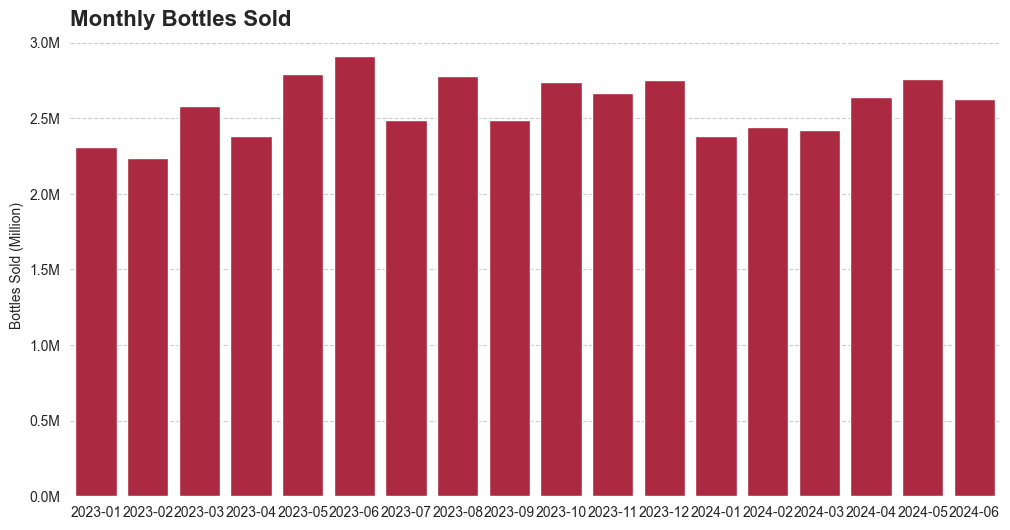

In [412]:
plt.figure(figsize= (12,6))
sns.barplot(data = product_month, x = 'Month Key', y = 'Bottles Sold (Million)', dodge=False, color = '#c11435') 
plt.title('Monthly Bottles Sold', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel("")
plt.grid(axis = 'y', linestyle ='--')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x))) 
plt.show()

In [413]:
print('Average Monthly Bottles Sold:',round(product_month['Bottles Sold'].mean(),0))

Average Monthly Bottles Sold: 2577880.0


In [414]:
''' 
Similar to the initial analyses of this report, the number of liquor bottles consumed per month also corresponds to the trends in business performance and customer trends. Liquor consumption increases sharply during the summer and winter months, and remains stable throughout the rest of the year with an average of approximately 2.6 million bottles per month.
'''

' \nSimilar to the initial analyses of this report, the number of liquor bottles consumed per month also corresponds to the trends in business performance and customer trends. Liquor consumption increases sharply during the summer and winter months, and remains stable throughout the rest of the year with an average of approximately 2.6 million bottles per month.\n'

# Question 12: How many different wine products does each customer consume?

In [415]:
# Group Product Name by Store Name
products_in_store = df.groupby(['Store Name']).agg({'Bottles Sold' : 'sum', 'Product Name' : 'nunique'}).reset_index()
# products_in_store = data.groupby(['Store Name'])[['Product Name']].nunique().reset_index()
products_in_store.sort_values(by = 'Product Name', ascending = False, inplace = True)
products_in_store = products_in_store.rename(columns = {'Product Name' : 'Unique Products'}).reset_index(drop = True)
products_in_store.head()

,Store Name,Bottles Sold,Unique Products
0,DECORAH MART / MARSHALLTOWN,125126,2801
1,WALL TO WALL WINE AND SPIRITS / WEST DES MOINES,213443,2604
2,HY-VEE FOOD STORE #3 (1142) / DES MOINES,1334470,2597
3,CENTRAL CITY 2 #1460,180211,2303
4,CYCLONE LIQUORS,69411,2296


In [416]:
'''
We have a total of 5,701 different types of liquor, however, the largest number of types of liquor consumed at a single store is 2,801, less than half of the total number.
This suggests that we are spending a significant amount of resources on storing a large number of types of liquor that do not sell or sell in negligible quantities.
Due to the limited information from the current dataset, it is not possible to make observations on the inventory levels of each liquor product in order to provide more effective solutions in this analysis. Further relevant information needs to be collected in order to provide the most optimal solutions.
'''

'\nWe have a total of 5,701 different types of liquor, however, the largest number of types of liquor consumed at a single store is 2,801, less than half of the total number.\nThis suggests that we are spending a significant amount of resources on storing a large number of types of liquor that do not sell or sell in negligible quantities.\nDue to the limited information from the current dataset, it is not possible to make observations on the inventory levels of each liquor product in order to provide more effective solutions in this analysis. Further relevant information needs to be collected in order to provide the most optimal solutions.\n'

# Question 13: Do customers who consume a more diverse variety of wines tend to purchase more products and generate more profit?

In [417]:
products_in_store = pd.merge( products_in_store,summary_customers, on = 'Store Name')
products_in_store.head()

,Store Name,Bottles Sold,Unique Products,Cost,Revenue,Profit,County,Customer Segment
0,DECORAH MART / MARSHALLTOWN,125126,2801,1586950.87,2376682.91,789732.04,MARSHALL,Champions
1,WALL TO WALL WINE AND SPIRITS / WEST DES MOINES,213443,2604,3991800.12,5984033.94,1992233.82,DALLAS,Champions
2,HY-VEE FOOD STORE #3 (1142) / DES MOINES,1334470,2597,16509236.16,24749608.44,8240372.28,POLK,Champions
3,CENTRAL CITY 2 #1460,180211,2303,2125313.64,3184450.15,1059136.51,POLK,Champions
4,CYCLONE LIQUORS,69411,2296,1086519.54,1629493.93,542974.39,STORY,Champions


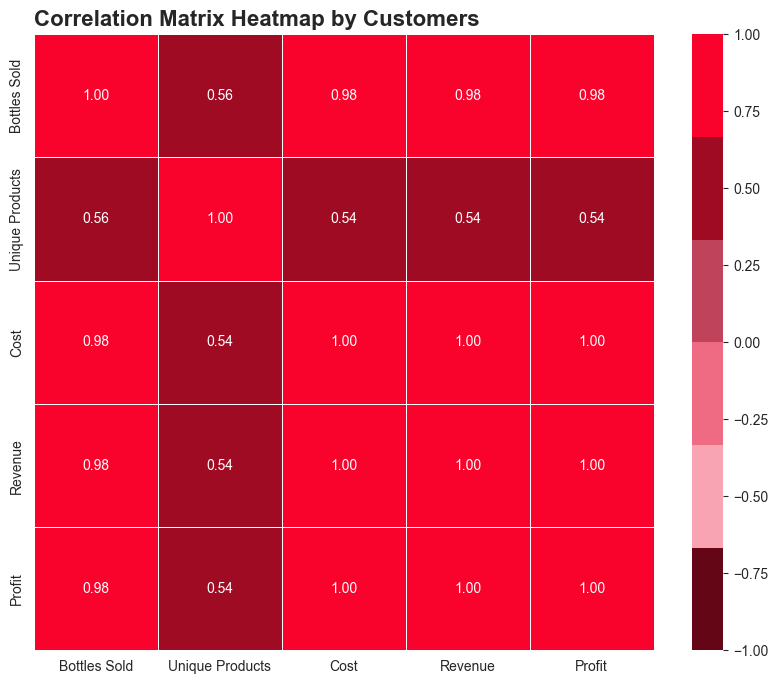

In [418]:
products_in_store = products_in_store.select_dtypes(include=[float, int])
corr_products = products_in_store.corr()
plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap by Customers', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.heatmap(data = corr_products, annot = True, cmap= custom_palette, vmin= -1, vmax= 1, linecolor = 'white', linewidths = 0.5, fmt = '.2f')
plt.show()

In [419]:
'''
While product diversity has a positive impact, it is not the main factor influencing metrics such as revenue, profit, and total sales. The correlation values are not particularly strong, ranging only from 0.54 to 0.56.
'''

'\nWhile product diversity has a positive impact, it is not the main factor influencing metrics such as revenue, profit, and total sales. The correlation values are not particularly strong, ranging only from 0.54 to 0.56.\n'

# Question 14: Is the number of wine types consumed affected by customer segment?

In [420]:
products_seg = df.groupby(['Customer Segment'])['Product Name'].nunique().to_frame().sort_values(by = 'Product Name', ascending= True).reset_index()
products_seg

,Customer Segment,Product Name
0,Need Attention,2954
1,Potential Loyalist,3881
2,Big Spenders,4088
3,Champions,5595


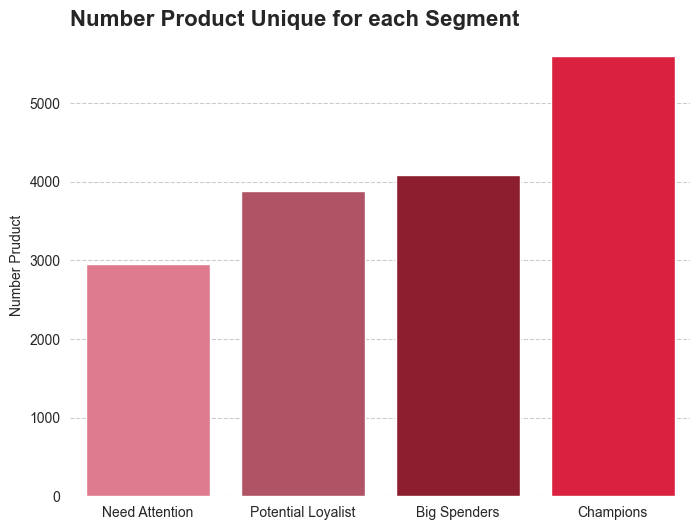

In [421]:
plt.figure(figsize = (8,6))
sns.barplot(data = products_seg, x = 'Customer Segment', y = 'Product Name', palette= RFM_color)
plt.title("Number Product Unique for each Segment", loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel("")
plt.ylabel("Number Pruduct")
plt.grid(axis = 'y', linestyle ='--')
plt.show()

In [422]:
'''
Customer segments have a significant impact on the consumption of various types of liquor.
Champions segment consumes 5,595 out of the 5,701 liquor products we currently have, meaning that these customers consume almost all of the products we have, even though the number of customers in this segment is only 502 stores.
Big Spenders and Potential Loyalist segments consume between 3,881 and 4,088 different products, with a moderate level of diversity for these two groups.
And the lowest is the Need Attention segment, which consumes only less than 3,000 different products in a year.
'''

'\nCustomer segments have a significant impact on the consumption of various types of liquor.\nChampions segment consumes 5,595 out of the 5,701 liquor products we currently have, meaning that these customers consume almost all of the products we have, even though the number of customers in this segment is only 502 stores.\nBig Spenders and Potential Loyalist segments consume between 3,881 and 4,088 different products, with a moderate level of diversity for these two groups.\nAnd the lowest is the Need Attention segment, which consumes only less than 3,000 different products in a year.\n'

# Dimension: Place

# Question 15: Is the number of customers affected by geographic location?

In [423]:
store_in_county = df.groupby(['County'])['Store Name'].nunique().to_frame().sort_values(by = 'Store Name', ascending= False).reset_index()
store_in_county = store_in_county.rename(columns = {'Store Name' : 'Count'})
store_in_county

,County,Count
0,POLK,287
1,LINN,150
2,SCOTT,98
3,BLACK HAWK,96
4,JOHNSON,87
...,...,...
94,FREMONT,4
95,WORTH,4
96,ADAMS,3
97,DAVIS,2


In [424]:
#  Create colors for chart
bar_color = []
for i in range(len(store_in_county)):
    if store_in_county['County'][i] == 'POLK':
        bar_color.append('#a00b24')
    else:
        bar_color.append('#bf445b')

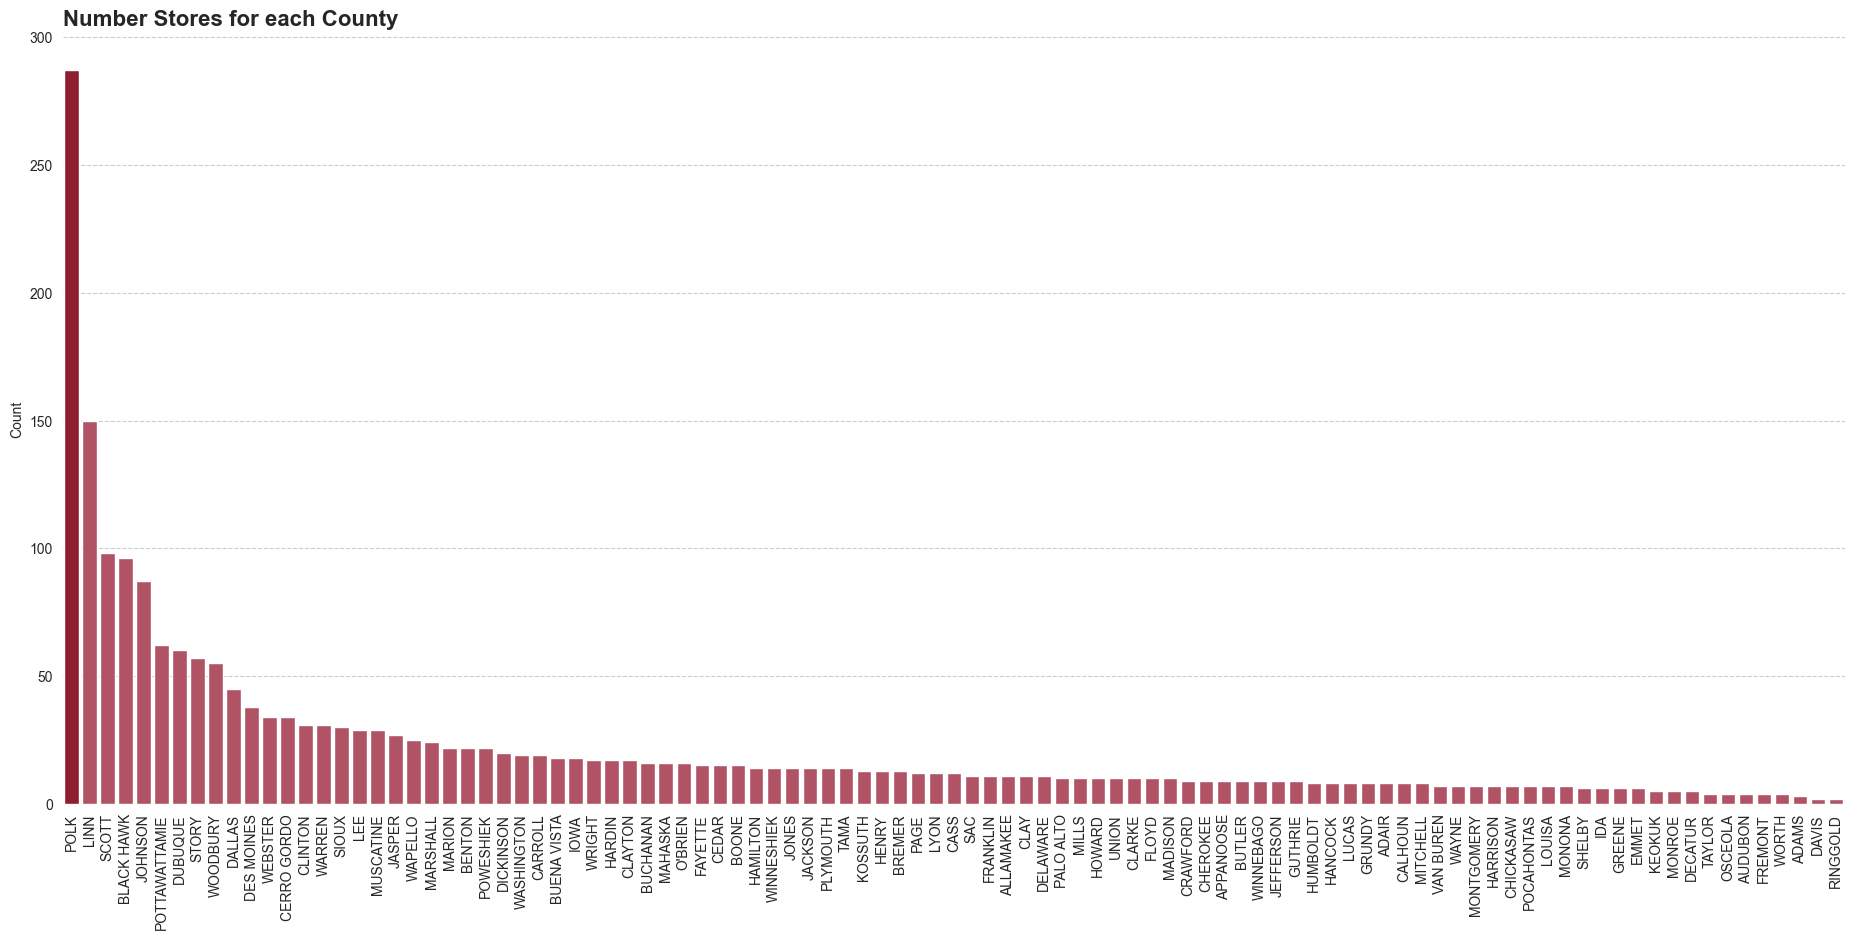

In [425]:
# Visualize Store In County
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (23,10))
sns.barplot(data = store_in_county, x = 'County', y = 'Count', dodge=False, palette= bar_color) 
plt.title('Number Stores for each County', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('')
plt.xticks(rotation = 90)
plt.show()

In [426]:
store_in_county.describe()

,Count
count,99.000000
mean,21.797980
std,35.112931
min,2.000000
25%,8.000000
50%,12.000000
75%,19.500000
max,287.000000


In [427]:
# Calculate sum stores
total_store = store_in_county['Count'].sum()

# Calculate the cumulative total and the corresponding number of stores
cumulative_store = 0
num_stores_for_50_percent = 0
stores_for_50_percent = []

for index, row in store_in_county.iterrows():
    cumulative_store += row['Count']
    num_stores_for_50_percent += 1
    stores_for_50_percent.append({'County': row['County'], 'Number Store': row['Count']})
    if cumulative_store > 0.5 * total_store:
        break

# Create new Dataframe from list county contain 50% stores
df_50_percent_store = pd.DataFrame(stores_for_50_percent)

print("We have a total of ", store_in_county['County'].count(),"counties, in which 50% of the stores are concentrated in", num_stores_for_50_percent, 'counties')
print("Create a new DataFrame containing information about the districts that account for 50% of the stores:")
df_50_percent_store

We have a total of  99 counties, in which 50% of the stores are concentrated in 13 counties
Create a new DataFrame containing information about the districts that account for 50% of the stores:


,County,Number Store
0,POLK,287
1,LINN,150
2,SCOTT,98
3,BLACK HAWK,96
4,JOHNSON,87
5,POTTAWATTAMIE,62
6,DUBUQUE,60
7,STORY,57
8,WOODBURY,55
9,DALLAS,45


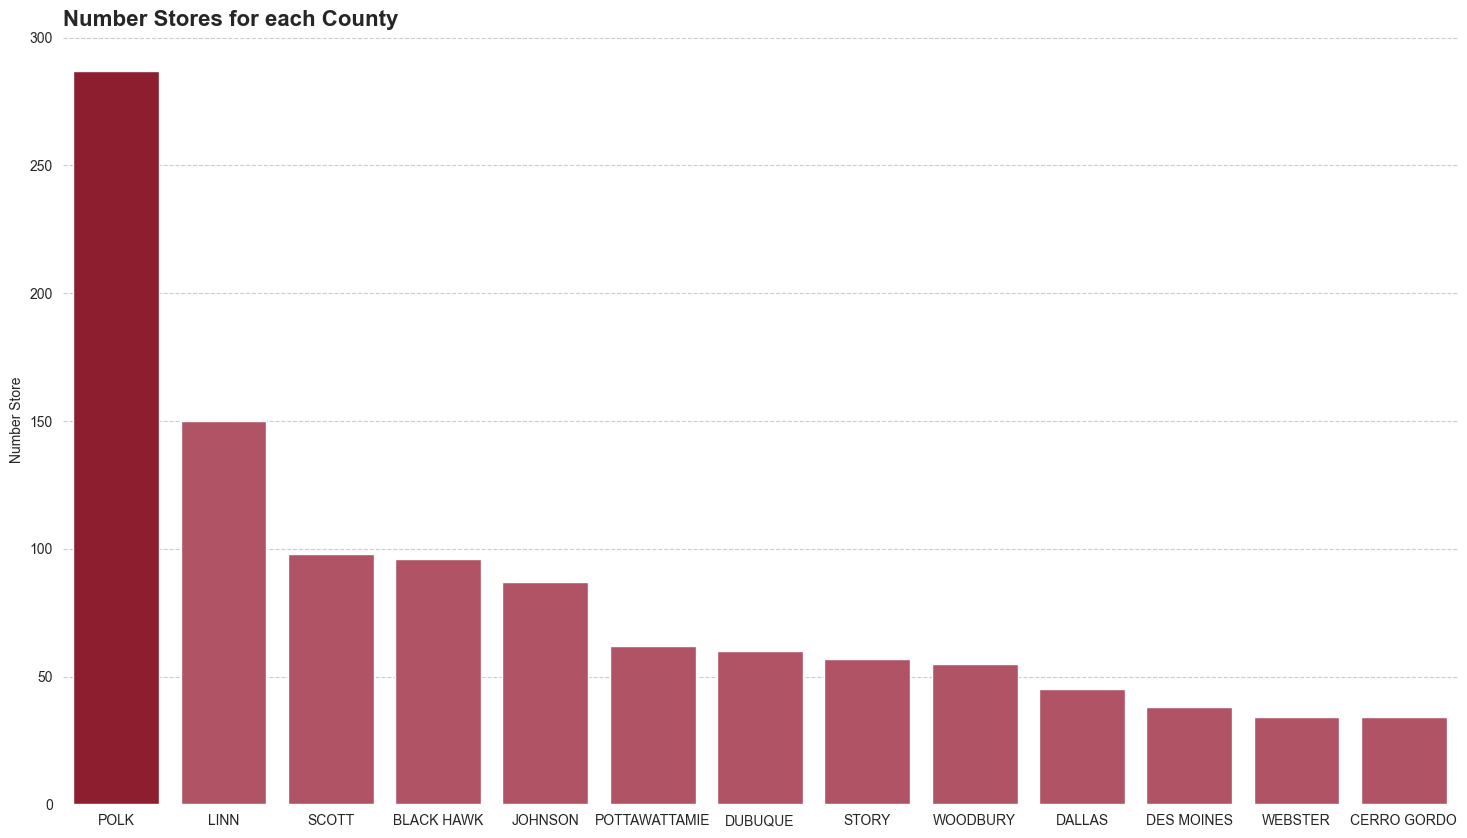

In [428]:
# Visualize Store In County
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (18,10))
sns.barplot(data = df_50_percent_store, x = 'County', y = 'Number Store', dodge=False, palette= bar_color) 
plt.title('Number Stores for each County', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.grid(axis = 'y', linestyle ='--')
plt.show()

In [429]:
'''
Store count is indeed heavily influenced by geographical location, considering that 50% of our stores are concentrated in 13 out of 99 counties in the state of Iowa.
Among these, Polk County has the highest concentration of stores with 287, followed by Linn County with 150, far exceeding the number of stores in the rest of the state.

Polk County is located in the U.S. state of Iowa. According to the 2020 census, the population was 492,401. It is the most populous county in Iowa and home to over 15% of the state's residents. The county seat is Des Moines, which is also the capital city of Iowa. https://en.wikipedia.org/wiki/Polk_County,_Iowa
This partly explains why it has the highest concentration of stores in the state.
'''

"\nStore count is indeed heavily influenced by geographical location, considering that 50% of our stores are concentrated in 13 out of 99 counties in the state of Iowa.\nAmong these, Polk County has the highest concentration of stores with 287, followed by Linn County with 150, far exceeding the number of stores in the rest of the state.\n\nPolk County is located in the U.S. state of Iowa. According to the 2020 census, the population was 492,401. It is the most populous county in Iowa and home to over 15% of the state's residents. The county seat is Des Moines, which is also the capital city of Iowa. https://en.wikipedia.org/wiki/Polk_County,_Iowa\nThis partly explains why it has the highest concentration of stores in the state.\n"

# Question 16: Is profit affected by geographic location?

In [430]:
county_summary = df.groupby('County').agg({"Total Cost" : "sum",
                                             "Sale (Dollars)" : "sum"}).reset_index()
county_summary["Profit (Million)"] = round((county_summary["Sale (Dollars)"] - county_summary["Total Cost"])/1000000,2)
county_summary = county_summary.sort_values(by= "Profit (Million)", ascending= False).reset_index(drop= True)

county_summary

,County,Total Cost,Sale (Dollars),Profit (Million)
0,POLK,1.033285e+08,1.548457e+08,51.52
1,LINN,3.699810e+07,5.541591e+07,18.42
2,SCOTT,2.799290e+07,4.192718e+07,13.93
3,JOHNSON,2.496639e+07,3.741484e+07,12.45
4,BLACK HAWK,2.258683e+07,3.384622e+07,11.26
...,...,...,...,...
94,FREMONT,2.355727e+05,3.524625e+05,0.12
95,VAN BUREN,2.348366e+05,3.519183e+05,0.12
96,RINGGOLD,2.490968e+05,3.734263e+05,0.12
97,TAYLOR,1.670968e+05,2.505624e+05,0.08


In [431]:
county_summary = pd.merge(county_summary[['County', 'Profit (Million)']], store_in_county, on = 'County')
county_summary

,County,Profit (Million),Count
0,POLK,51.52,287
1,LINN,18.42,150
2,SCOTT,13.93,98
3,JOHNSON,12.45,87
4,BLACK HAWK,11.26,96
...,...,...,...
94,FREMONT,0.12,4
95,VAN BUREN,0.12,7
96,RINGGOLD,0.12,2
97,TAYLOR,0.08,4


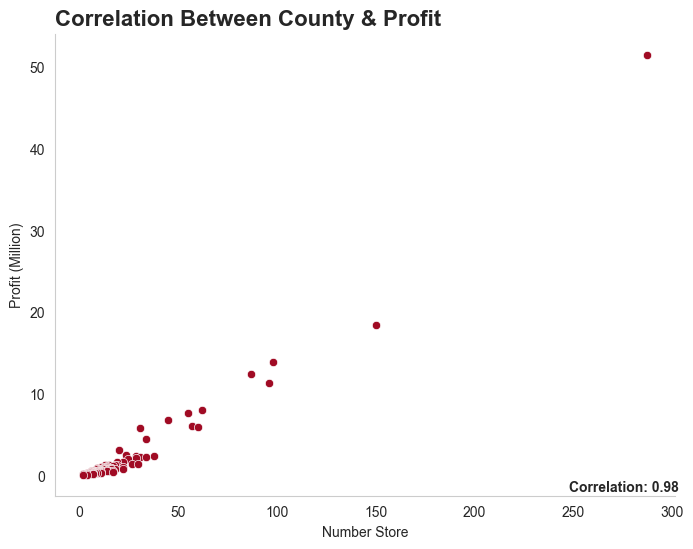

In [432]:
# Calculate the correlation coefficient
correlation = county_summary['Count'].corr(county_summary['Profit (Million)'])
# Create chart
plt.figure(figsize = (8,6))
sns.scatterplot(data = county_summary, x = 'Count', y = 'Profit (Million)', color = '#a00b24')
plt.xlabel('Number Store')
plt.title('Correlation Between County & Profit', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.despine(left=False, bottom=False)
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.83, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

In [433]:
# Group average liquor price by each product, month, area
county_price_bottles = df.groupby(['County', 'Month', 'Product Name']).agg({'State Bottle Retail' : 'mean', 'Bottles Sold' : 'sum'}).reset_index()

# Group average liquor price of each county by month
county_price_bottles = county_price_bottles.groupby(['County', 'Month']).agg({'State Bottle Retail' : 'mean', 'Bottles Sold' : 'sum'}).reset_index()

#  Group average liquor price by area
county_price_bottles = county_price_bottles.groupby('County').agg({'State Bottle Retail' : 'mean', 'Bottles Sold' : 'sum'}).reset_index()

county_price_bottles['Bottles Sold (Million)'] = round(county_price_bottles['Bottles Sold']/1000000, 2)
county_price_bottles['State Bottle Retail'] = round(county_price_bottles['State Bottle Retail'], 2)

county_summary = pd.merge(county_summary, county_price_bottles[['County', 'State Bottle Retail', 'Bottles Sold (Million)']], on = 'County')
county_summary

,County,Profit (Million),Count,State Bottle Retail,Bottles Sold (Million)
0,POLK,51.52,287,27.61,10.70
1,LINN,18.42,150,25.96,4.08
2,SCOTT,13.93,98,24.90,3.27
3,JOHNSON,12.45,87,25.82,2.38
4,BLACK HAWK,11.26,96,24.33,2.59
...,...,...,...,...,...
94,FREMONT,0.12,4,21.17,0.03
95,VAN BUREN,0.12,7,17.31,0.03
96,RINGGOLD,0.12,2,19.17,0.03
97,TAYLOR,0.08,4,17.42,0.02


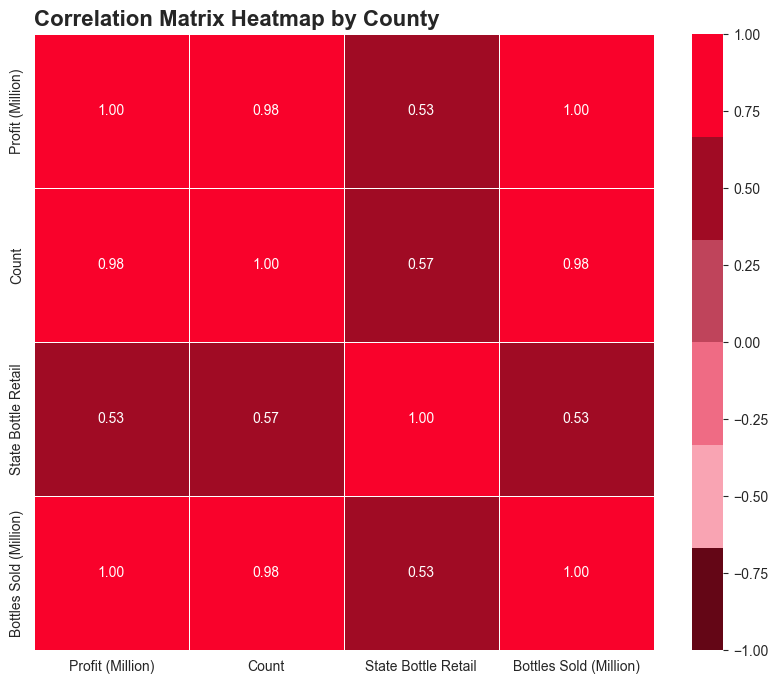

In [434]:
county_summary = county_summary.select_dtypes(include=[float, int])
county_corr = county_summary.corr()

plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap by County', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sns.heatmap(data = county_corr, annot = True, cmap= custom_palette, vmin= -1, vmax= 1, linecolor = 'white', linewidths = 0.5, fmt = '.2f')
plt.show()

In [435]:
'''
Profit is indeed influenced by geographical location. In central districts with high population density and a good standard of living, a large portion of stores are distributed to meet the high demand for living needs. The concentration of stores in these "golden" areas drives sales and increases profits in a positive linear relationship.
However, retail/wholesale prices are not geographically dependent. The correlation coefficients are only at an average level, indicating that we maintain relatively stable selling prices that are not overly influenced by external factors. This is also a good sign for customer retention.
'''

'\nProfit is indeed influenced by geographical location. In central districts with high population density and a good standard of living, a large portion of stores are distributed to meet the high demand for living needs. The concentration of stores in these "golden" areas drives sales and increases profits in a positive linear relationship.\nHowever, retail/wholesale prices are not geographically dependent. The correlation coefficients are only at an average level, indicating that we maintain relatively stable selling prices that are not overly influenced by external factors. This is also a good sign for customer retention.\n'

# III. Export Data

In [436]:
# Date data to build dashboard in PBI
data_date = df[['Order Date', 'Month']]
data_date = data_date.drop_duplicates(subset= 'Order Date')
data_date.to_csv('data_model_pbi_Iowa_Liquor_Date.csv', index = False)
data_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 3883345
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  446 non-null    datetime64[ns]
 1   Month       446 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 8.7 KB


In [438]:
# Sales data to build dashboard in PBI
data_sales = df[['Invoice Number', 'Order Date', 'Store Number', 'Item Number', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)']]
data_sales.to_csv('data_model_pbi_Iowa_Liquor_Sales.csv', index = False)
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885075 entries, 0 to 3885074
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Invoice Number       object        
 1   Order Date           datetime64[ns]
 2   Store Number         int64         
 3   Item Number          int64         
 4   State Bottle Cost    float64       
 5   State Bottle Retail  float64       
 6   Bottles Sold         int64         
 7   Sale (Dollars)       float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 237.1+ MB


In [440]:
# Customer data to build dashboard in PBI
data_customers = df[['Store Number', 'Store Name', 'Customer Segment', 'Address', 'County', 'Store Longitude', 'Store Latitude']].drop_duplicates()
data_customers.reset_index(drop = True, inplace = True)
data_customers.to_csv('data_model_pbi_Iowa_Liquor_Customers.csv', index = False)
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store Number      2158 non-null   int64  
 1   Store Name        2158 non-null   object 
 2   Customer Segment  2158 non-null   object 
 3   Address           2158 non-null   object 
 4   County            2158 non-null   object 
 5   Store Longitude   2158 non-null   float64
 6   Store Latitude    2158 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 118.1+ KB


In [443]:
# Product data to build dashboard in PBI
data_products = df[['Item Number', 'Product Name', 'Bottle Volume (ml)']].drop_duplicates().reset_index(drop = True)
data_products.to_csv('data_model_pbi_Iowa_Liquor_Products.csv', index = False)
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item Number         5701 non-null   int64 
 1   Product Name        5701 non-null   object
 2   Bottle Volume (ml)  5701 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 133.7+ KB


In [444]:
# County data to build dashboard in PBI
data_county = df[['County', 'Store Longitude', 'Store Latitude']].drop_duplicates(subset= 'County').reset_index(drop = True)
data_county.to_csv('data_model_pbi_Iowa_Liquor_County.csv', index = False)
data_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           99 non-null     object 
 1   Store Longitude  99 non-null     float64
 2   Store Latitude   99 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB


# IV. Conclusion

In [ ]:
'''
Positive Trends
    Seasonal Revenue Growth: Revenue experiences seasonal growth in summer and winter. Profit margins remain consistently high at 33% throughout the year.
    Steady Revenue Growth Rate: The average monthly revenue growth rate for 2023 and the first half of 2024 was 1.35%. Although not extremely high, this is a positive sign considering the global economic downturn.
    High Order Volumes: There were a total of 3,885,075 liquor orders, with volumes peaking in summer and winter.
    Stable Average Order Value: The average order value remains stable throughout the year, with only a small variation of around $30 between the highest and lowest months.
    Active Customer Base: There are 2,158 customers across the state, with a consistently high number of active customers each month.
    Profitable Champions Group: 23% of customers (the Champions group) generated 74% of profits, indicating a highly effective customer segment.
    Diverse Product Range: The store offers 5,701 different products and has sold over 46 million bottles of liquor. Certain types of liquor, such as Vodka, Mini, Bourbon, Reposado, Whiskey, and PET, bring in high profits.
    Statewide Customer Reach: Customers are spread across all 99 counties in Iowa, suggesting high product recognition and potential for future expansion outside the state.

Problems
    Periods of Negative Growth: Negative growth was observed in four periods over two years: July (-12.97%) and September (-11.8%) of 2023, and January (-8.21%) and June (-14.12%) of 2024. Post-holiday and shopping season slumps contribute to this decline.
    High Costs Due to Seasonal Fluctuations: High order volumes in summer and winter increase transportation and warehousing costs due to numerous small orders, leading to linear cost growth alongside revenue.
    Underutilized Customer Groups: Besides the Champions group, the other three customer groups generate only 26% of profits, indicating untapped potential among the 2,158 existing customers.
    Inefficient Product Storage: 25% of the 5,100 types of liquor sold fewer than 39 bottles each, while the most consumed type in one store was 2,801 bottles. This results in high storage and inventory costs.
    Geographical Profit Discrepancies: Although liquor is distributed across all counties, 50% of customers are concentrated in just 13 counties, with Polk County having the most at 287 stores. This increases shipping costs to distant counties without affecting prices.

Recommendations
    Seasonal Adaptation: Increase orders in summer and winter to meet high demand and reduce orders during low consumption periods to lower inventory and storage costs.
    Optimize Order Value:
        Analyze annual order values to determine a cost-effective threshold. Orders below this threshold incur higher shipping costs.
        Introduce special policies during growth periods (summer and winter) to boost order values, such as discounts or free shipping.
    Streamline Product Portfolio:
        Reduce imports of liquors in the bottom 25% (those selling fewer than 39 bottles) to save on storage costs.
        Conduct in-depth analysis of top-selling liquors to identify similar high-profit imports.
    Expand Customer Base: Since most customers are in central counties or the capital, expanding the customer base outside Iowa could significantly increase revenue and customer numbers.
This summary concludes the Sales Analysis section, with detailed analysis provided for each business question.
'''